# exploratory data analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import (
    RandomForestClassifier,
    RandomForestRegressor,
    VotingRegressor,
)
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

from sklearn.svm import SVR

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import chi2, VarianceThreshold
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error,
    accuracy_score,
)

pd.options.display.max_columns = None

In [2]:
boston = pd.read_csv(
    r"/home/ahmed/Ai/Kaggle-Competitions-Notebooks/boston House price prediction/Date_set/train.csv"
)
test = pd.read_csv(
    r"/home/ahmed/Ai/Kaggle-Competitions-Notebooks/boston House price prediction/Date_set/test.csv"
)
combin = [boston, test]

## 1. statistical analysis


In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
boston.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

##### There is a discrepancy between the data


In [5]:
null_columns = []

for col in boston.columns:
    if boston[col].isna().sum() > 0:
        null_columns.append([boston[col].isna().sum() * 100 / len(boston), col])

null_columns.sort()
null_columns.reverse()
null_columns

[[99.52054794520548, 'PoolQC'],
 [96.3013698630137, 'MiscFeature'],
 [93.76712328767124, 'Alley'],
 [80.75342465753425, 'Fence'],
 [59.726027397260275, 'MasVnrType'],
 [47.26027397260274, 'FireplaceQu'],
 [17.73972602739726, 'LotFrontage'],
 [5.5479452054794525, 'GarageYrBlt'],
 [5.5479452054794525, 'GarageType'],
 [5.5479452054794525, 'GarageQual'],
 [5.5479452054794525, 'GarageFinish'],
 [5.5479452054794525, 'GarageCond'],
 [2.6027397260273974, 'BsmtFinType2'],
 [2.6027397260273974, 'BsmtExposure'],
 [2.5342465753424657, 'BsmtQual'],
 [2.5342465753424657, 'BsmtFinType1'],
 [2.5342465753424657, 'BsmtCond'],
 [0.547945205479452, 'MasVnrArea'],
 [0.0684931506849315, 'Electrical']]

##### remove all columns with more than 40% missing data


In [6]:
boston["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Visualizations


In [7]:
def distribution(col, with_log):
    for j, i in enumerate(col):
        dataset = boston.copy()
        if with_log:
            dataset[col] = np.log(dataset[col])
        sns.histplot(data=dataset, x=i, kde=True)
        plt.show()
    return

In [8]:
def Scatter(col, with_log):

    dataset = boston.copy()
    for j, i in enumerate(col):
        if with_log:
            dataset[col] = np.log(dataset[col])

        plt.figure(figsize=(4, 3))
        sns.regplot(
            data=dataset,
            x=i,
            y="SalePrice",
        )
        plt.show()
    return

In [9]:
def Heat_map(col):
    dataset = boston[col].copy()
    corr = dataset.corr()
    plt.figure(figsize=(25, 13))
    sns.heatmap(corr, annot=True)

In [10]:
def years_lineplot(year_columns):
    plt.figure(figsize=(20, 20))
    dataset = boston.copy()
    for i, col in enumerate(year_columns):
        plt.subplot(6, 4, i + 1)
        dataset.groupby(col)["SalePrice"].median().plot()
        plt.xlabel(col)
        plt.ylabel("Median House Price")
        plt.title("House Price vs YearSold")

In [11]:
def null_columns_relation(col):
    plt.figure(figsize=(20, 20))

    for i, col in enumerate(col):
        temp_dataset = boston.copy()
        # indicates 1 if value is null otherwize 0
        temp_dataset[col] = np.where(temp_dataset[col].isnull(), 1, 0)
        plt.subplot(6, 4, i + 1)
        # Now we need to create a bar plot to visualize the SalePrice of null values
        sns.barplot(
            data=temp_dataset,
            x=col,
            y="SalePrice",
            width=0.2,
            saturation=0.5,
            errorbar=None,
        )
        plt.yticks(np.arange(0, 200000, 25000))

In [12]:
def numerical_discrete_columns(numerical_discrete):
    plt.figure(figsize=(30, 30))
    dataset = boston.copy()
    for i, col in enumerate(numerical_discrete):
        plt.subplot(5, 4, i + 1)
        sns.barplot(
            data=dataset,
            x=col,
            y="SalePrice",
            width=0.5,
            estimator=np.std,
            saturation=0.5,
            errorbar=None,
        )
        plt.xticks(rotation=90)
        plt.xlabel(col)
        plt.ylabel("SalePrice")
        plt.title(col)

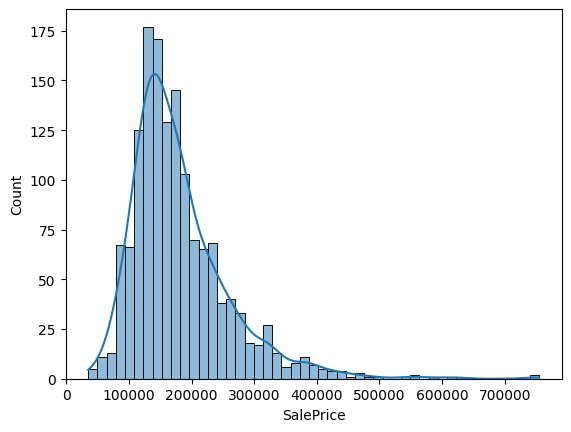

skew 1.8828757597682129
kurt 6.536281860064529


In [13]:
distribution(["SalePrice"], 0)

print("skew", boston["SalePrice"].skew())
print("kurt", boston["SalePrice"].kurt())

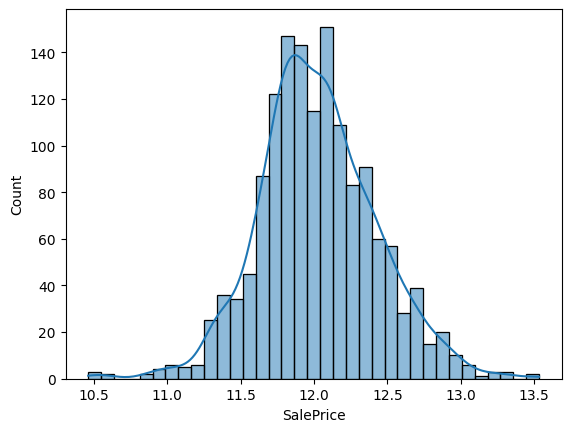

In [14]:
distribution(["SalePrice"], 1)

In [15]:
numerical_columns = []
for col in boston.columns:
    if boston[col].dtype != "O" and col != "Id" and col != "SalePrice":
        numerical_columns.append(col)

numerical_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

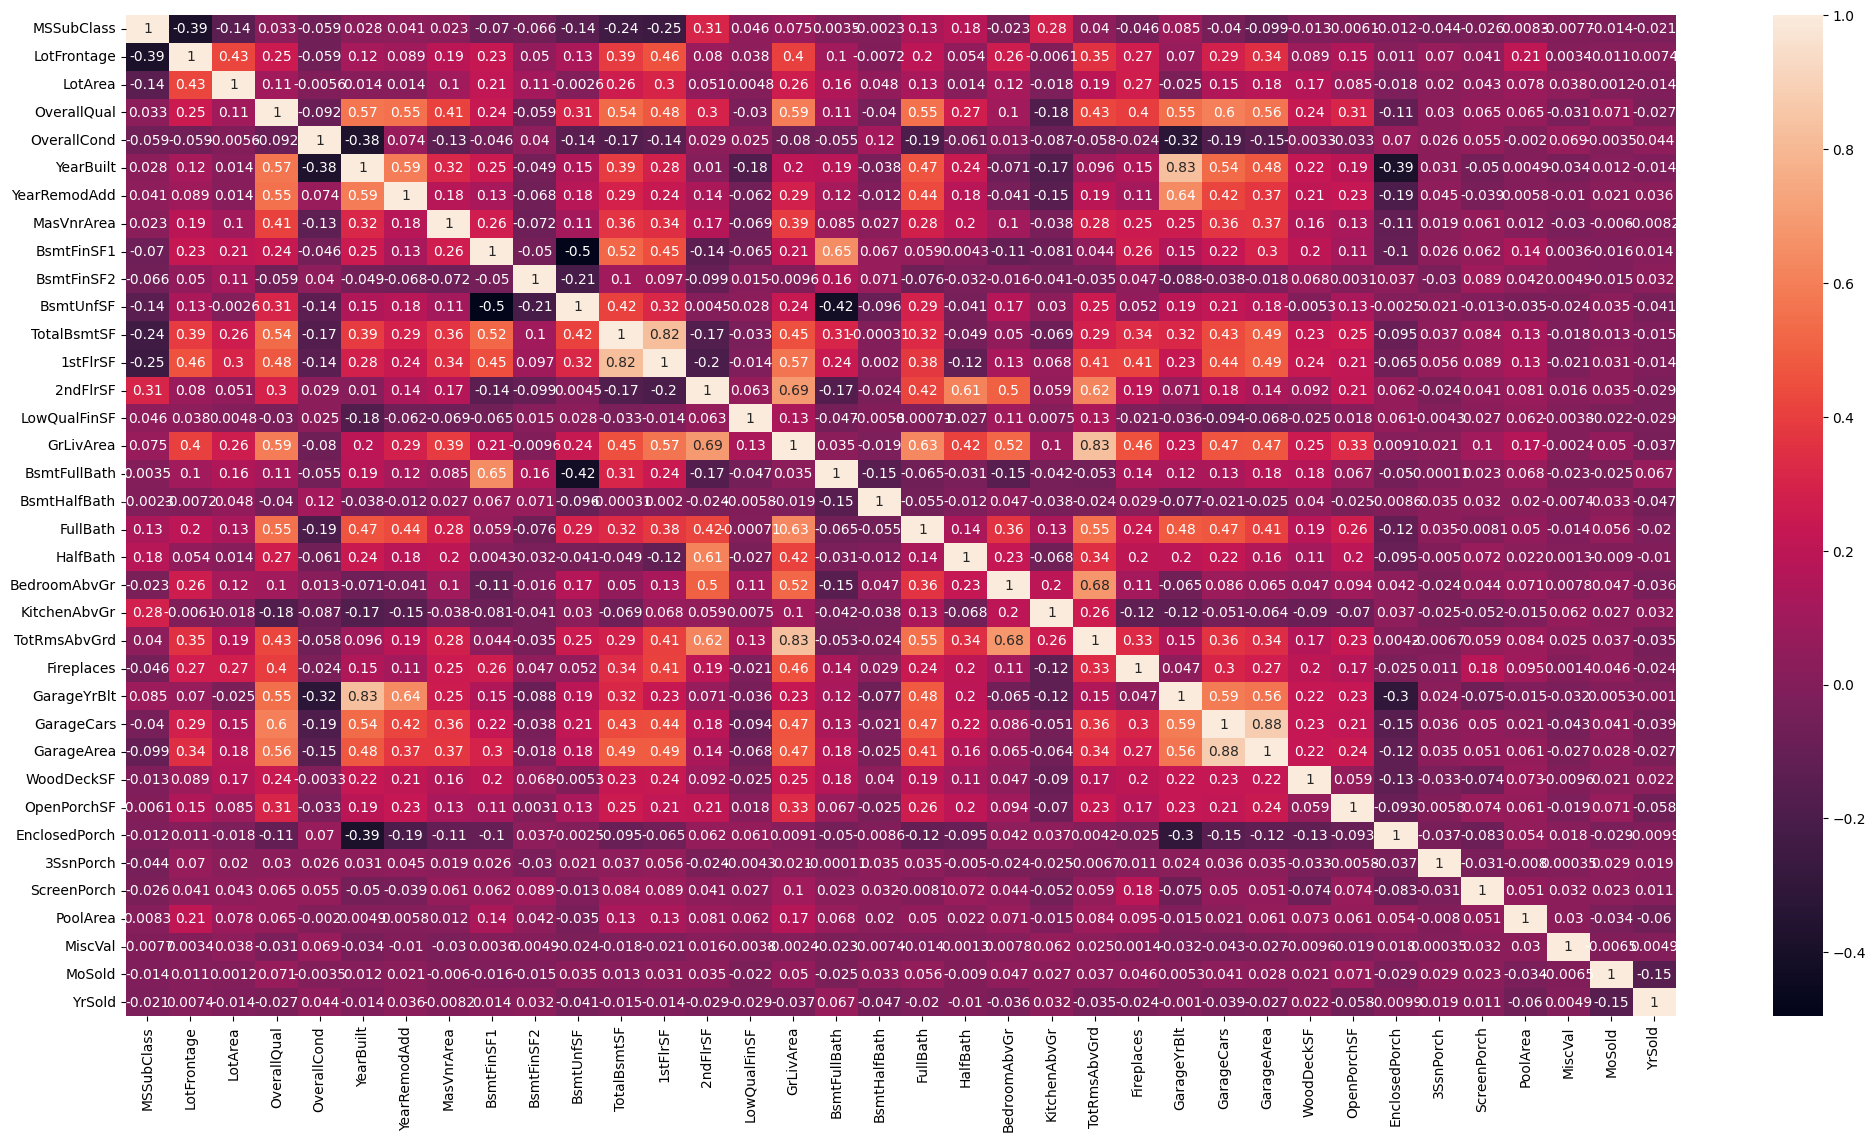

In [16]:
Heat_map(numerical_columns)

##### we can remove the high correlated columns and let only one column


['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'PoolArea']


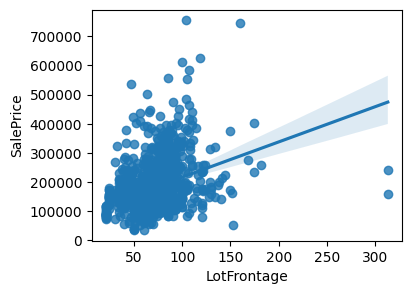

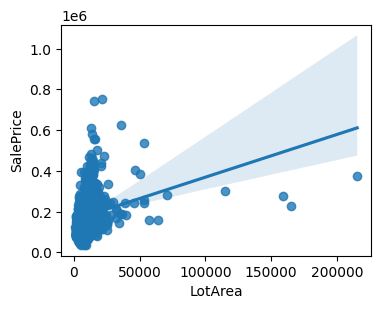

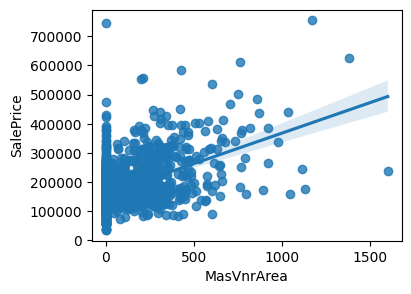

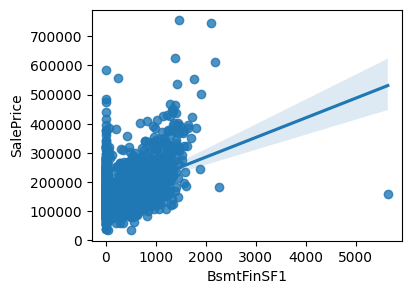

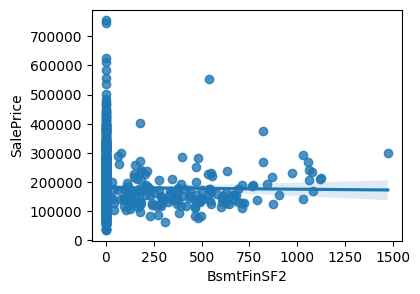

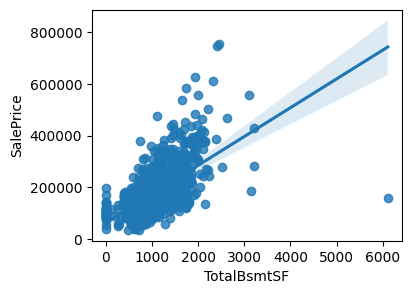

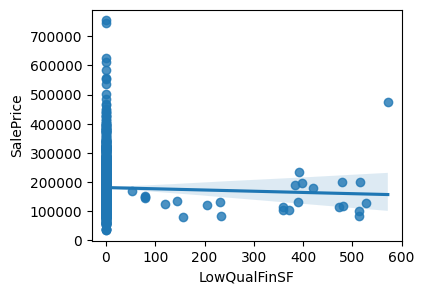

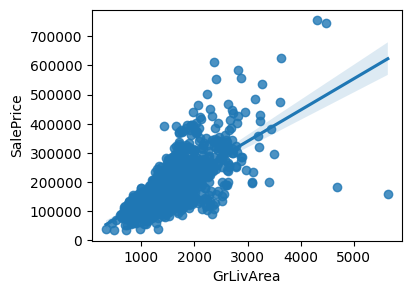

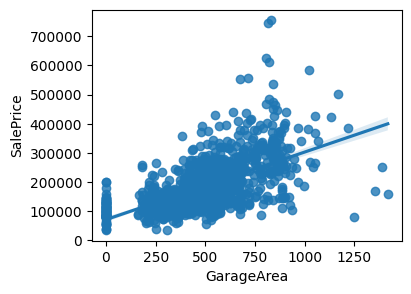

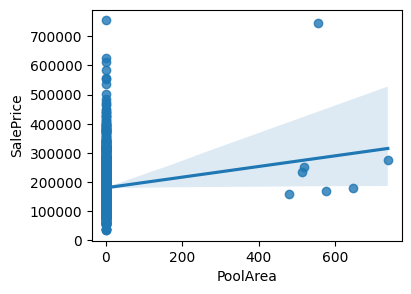

In [17]:
## get all columns with areas to find the relathon between them and price
areas = []
for i in numerical_columns:
    if (
        i.find("Area") != -1
        or i.find("Lot") != -1
        or i.find("FinSF") != -1
        or i.find("TotalBsmtSF") != -1
    ):
        areas.append(i)
print(areas)
Scatter(areas, 0)

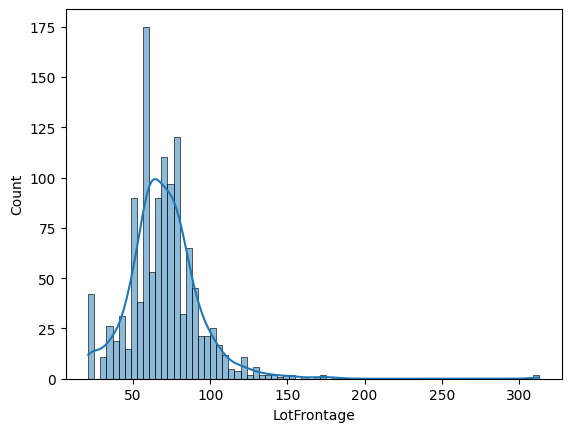

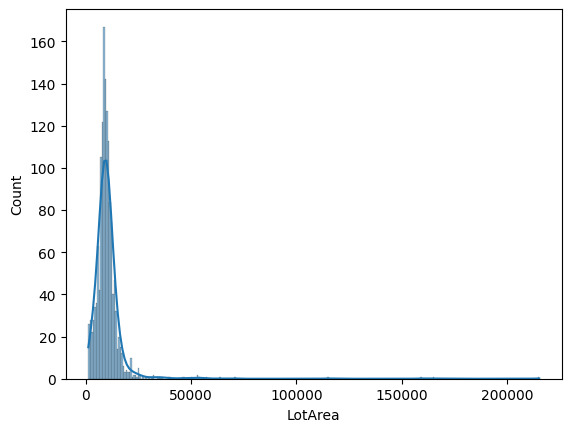

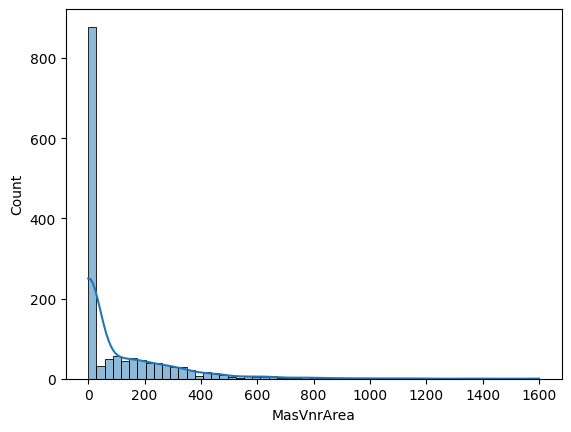

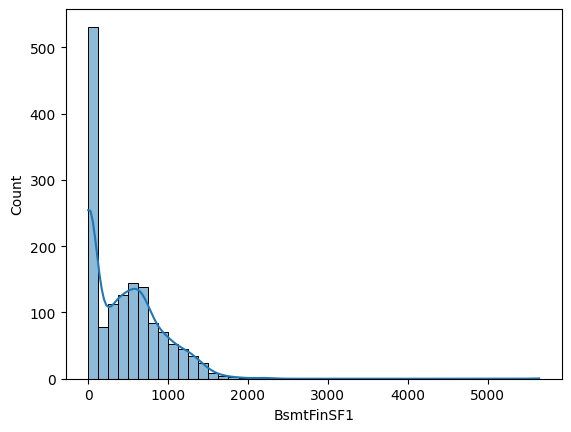

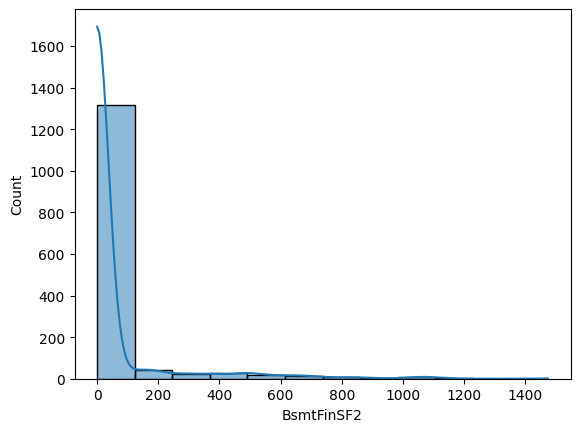

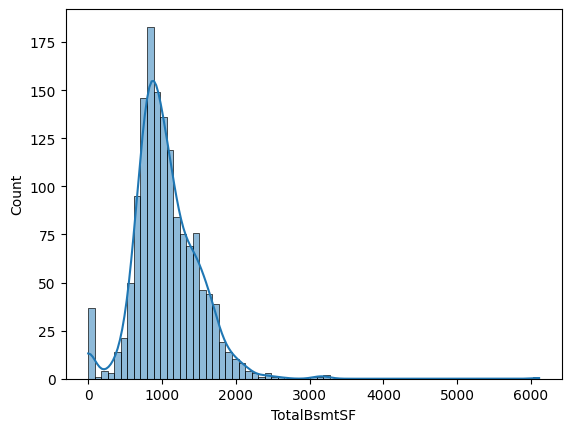

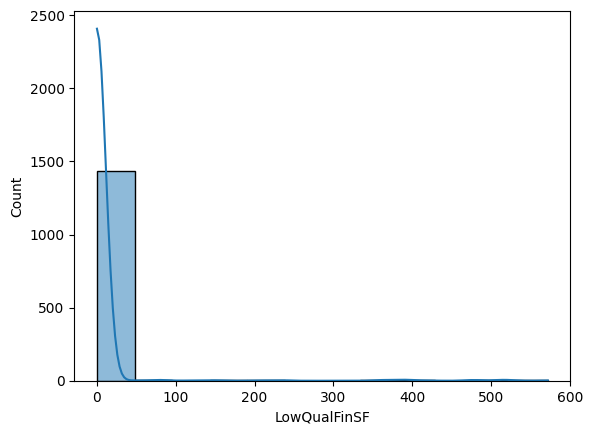

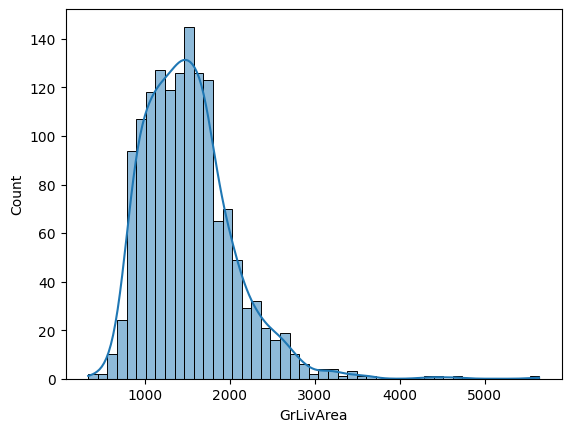

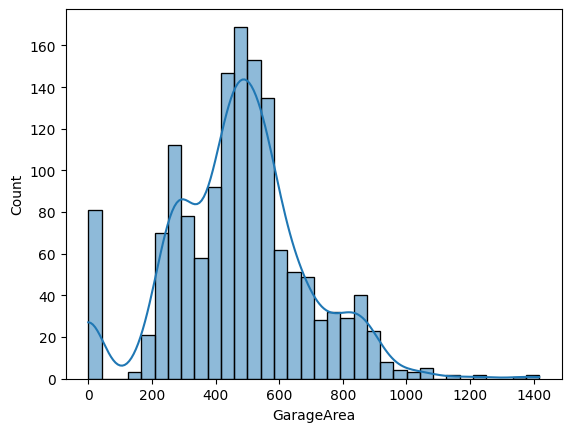

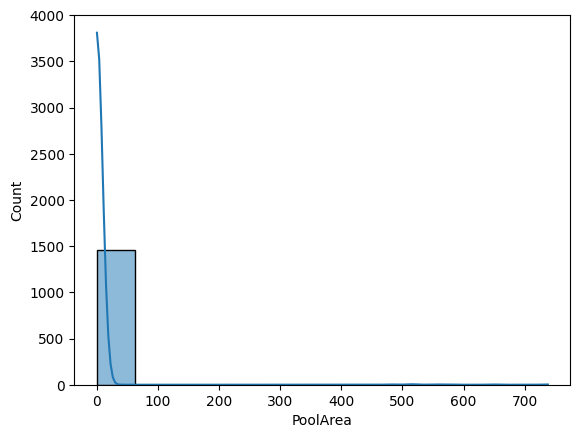

In [18]:
distribution(areas, 0)

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


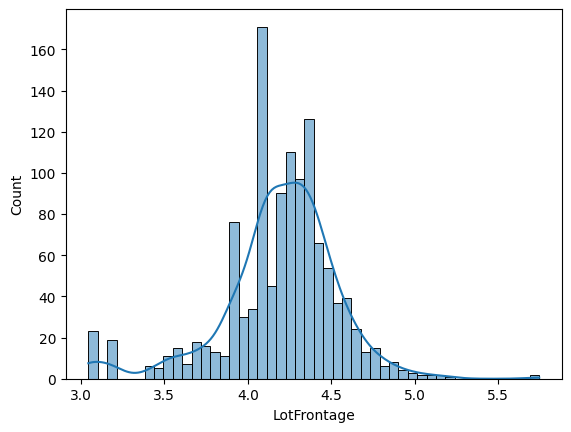

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


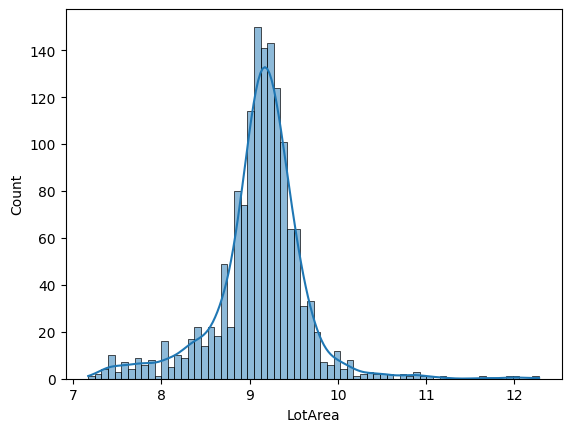

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


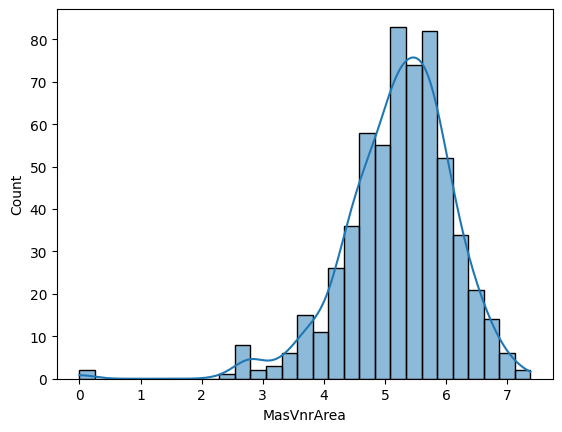

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


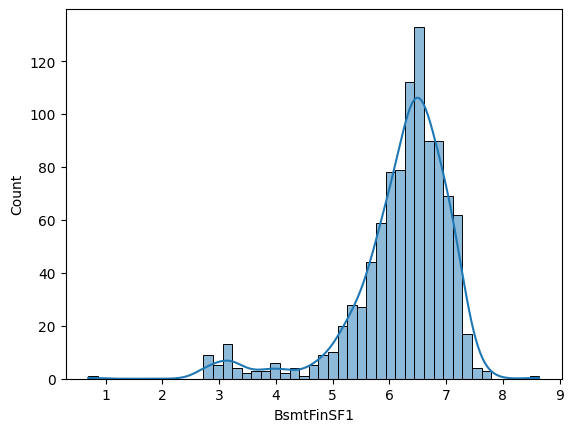

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


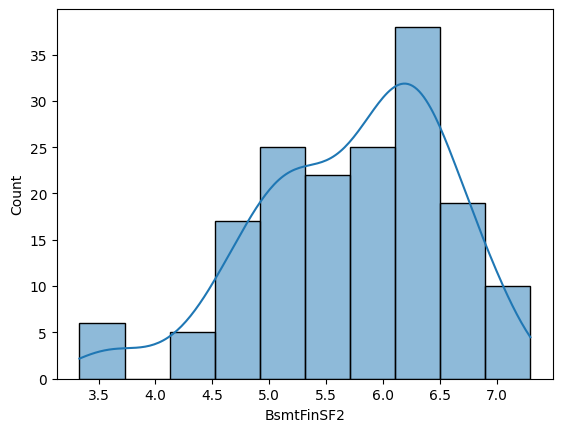

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


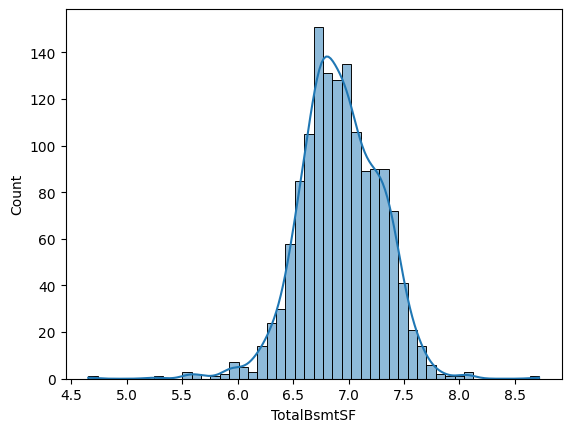

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


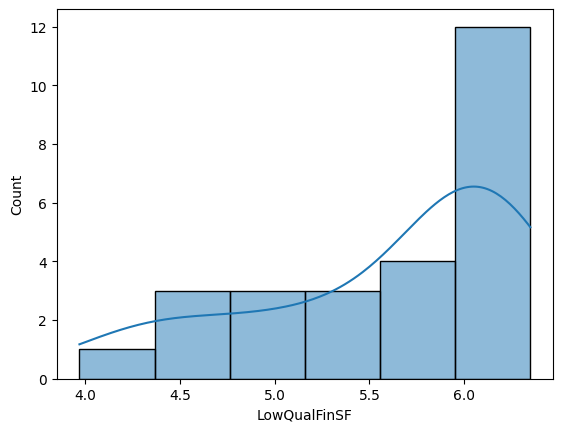

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


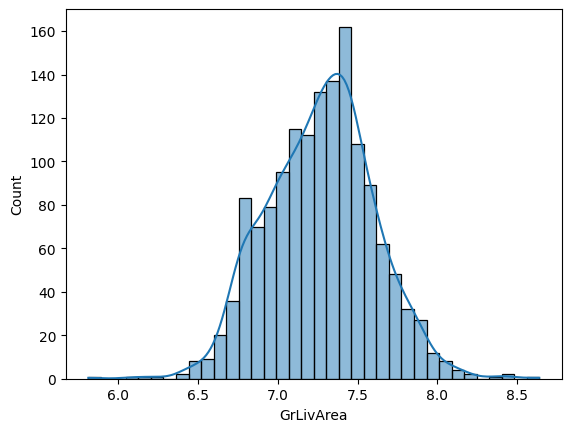

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


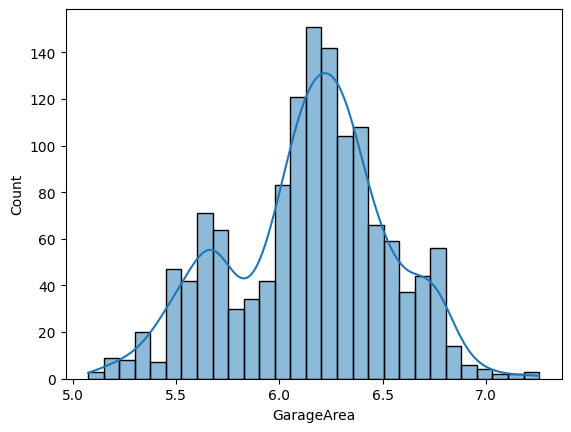

/home/ahmed/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


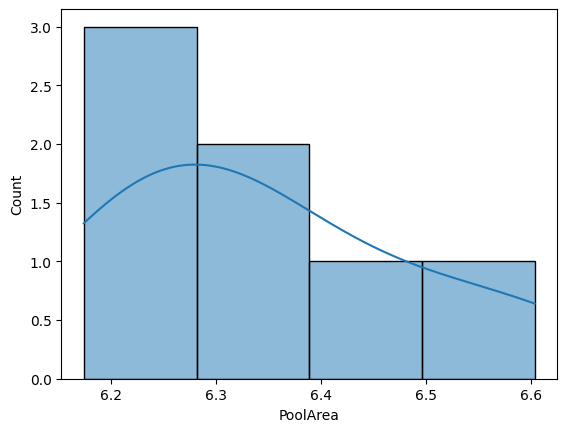

In [19]:
distribution(areas, 1)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


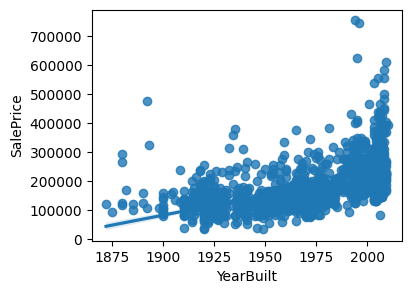

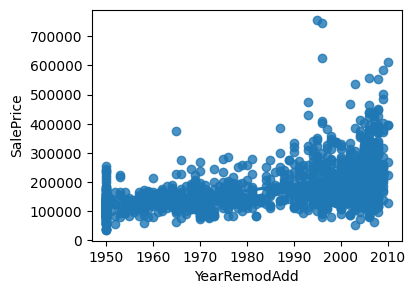

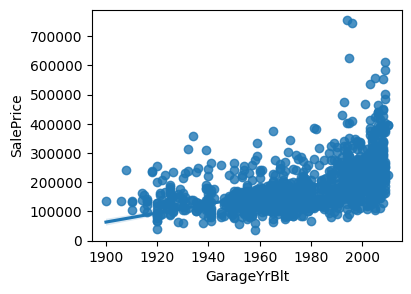

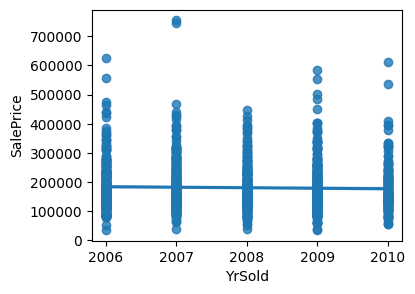

In [20]:
## get all columns with Year to find the relathon between them and price
Years = []
for i in numerical_columns:
    if i.find("Year") != -1 or i.find("Yr") != -1:
        Years.append(i)
print(Years)
Scatter(Years, 0)

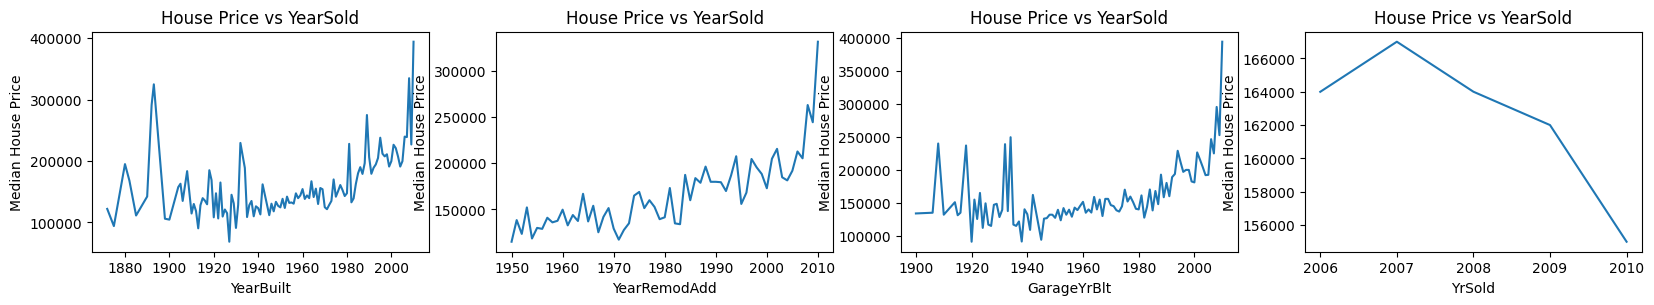

In [21]:
years_lineplot(Years)

['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']


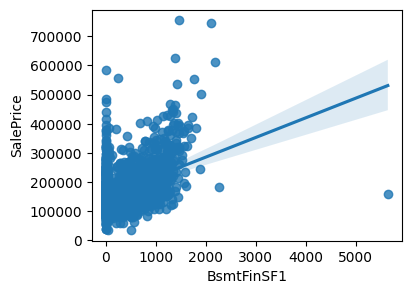

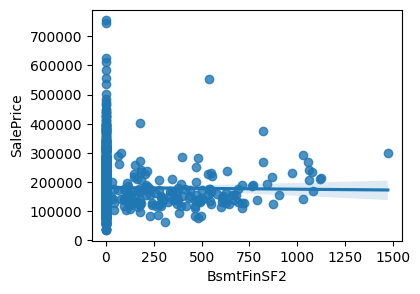

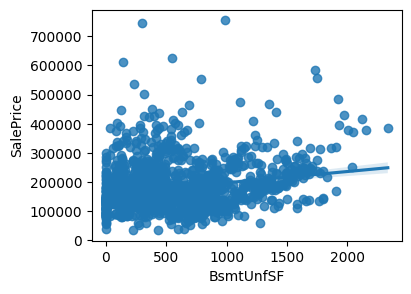

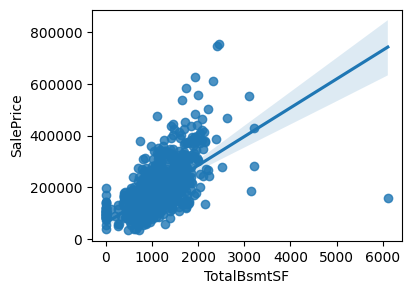

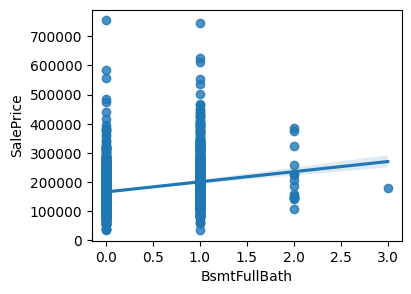

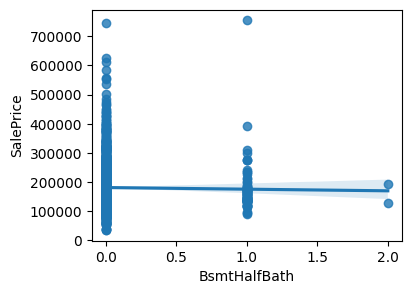

In [22]:
## get all columns with Bsmt to find the relathon between them and price
Bsmt = []
for i in numerical_columns:
    if i.find("Bsmt") != -1:
        Bsmt.append(i)
print(Bsmt)
Scatter(Bsmt, 0)

FullBath, HalfBath and BsmtFinSF2 doesn't effect

the other columns have a kind of a relation but not strong


['BedroomAbvGr', 'KitchenAbvGr']


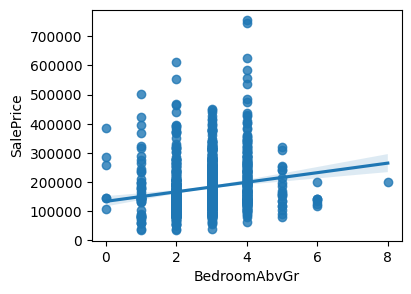

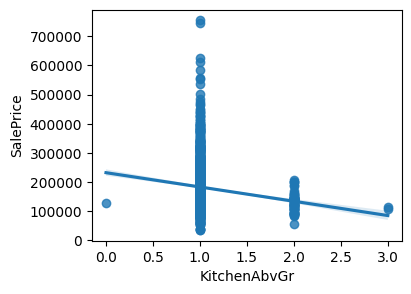

In [23]:
## get all columns with Kitchen and  Bed to find the relathon between them and price
KitchenBed = []
for i in numerical_columns:
    if i.find("Bed") != -1 or i.find("Kitchen") != -1:
        KitchenBed.append(i)
print(KitchenBed)
Scatter(KitchenBed, 0)

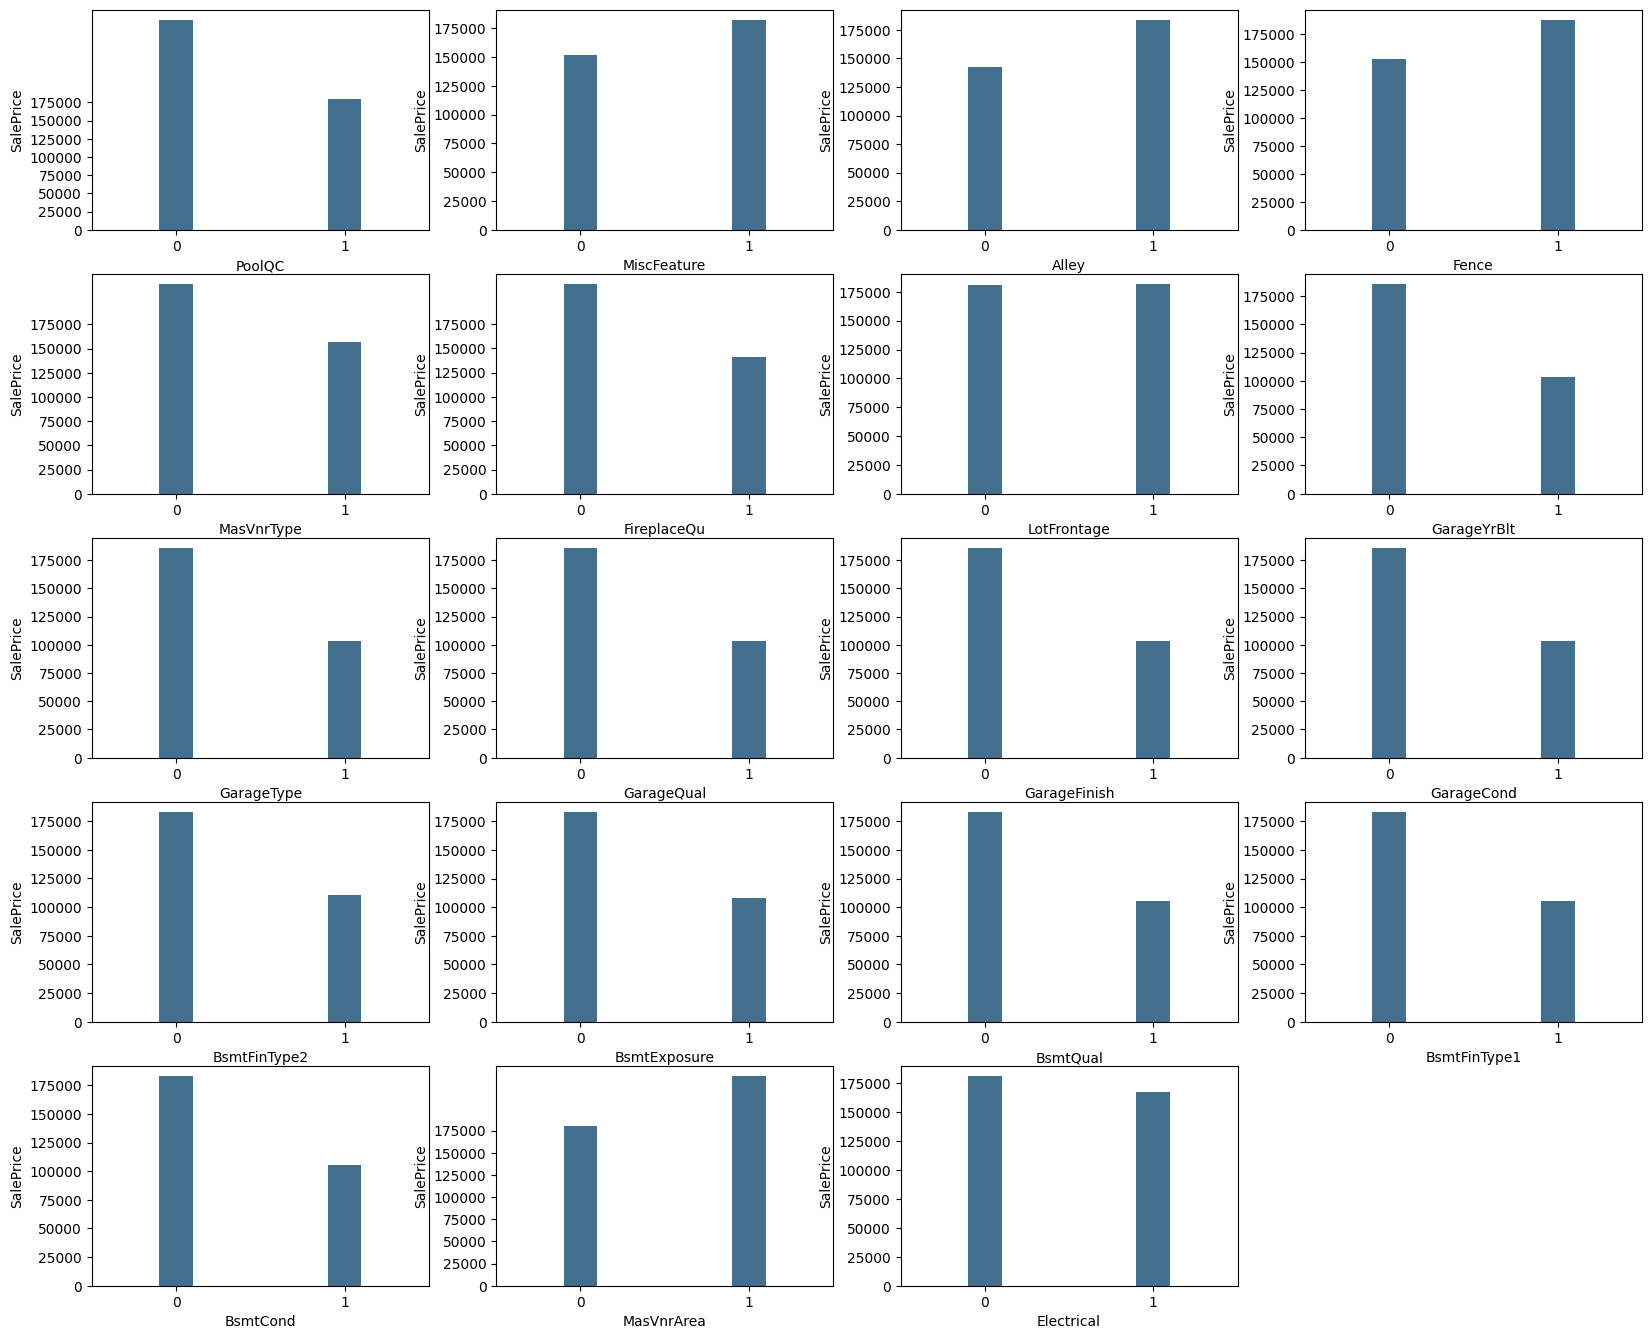

In [24]:
cols = []

for i, j in null_columns:
    cols.append(j)
null_columns_relation(cols)

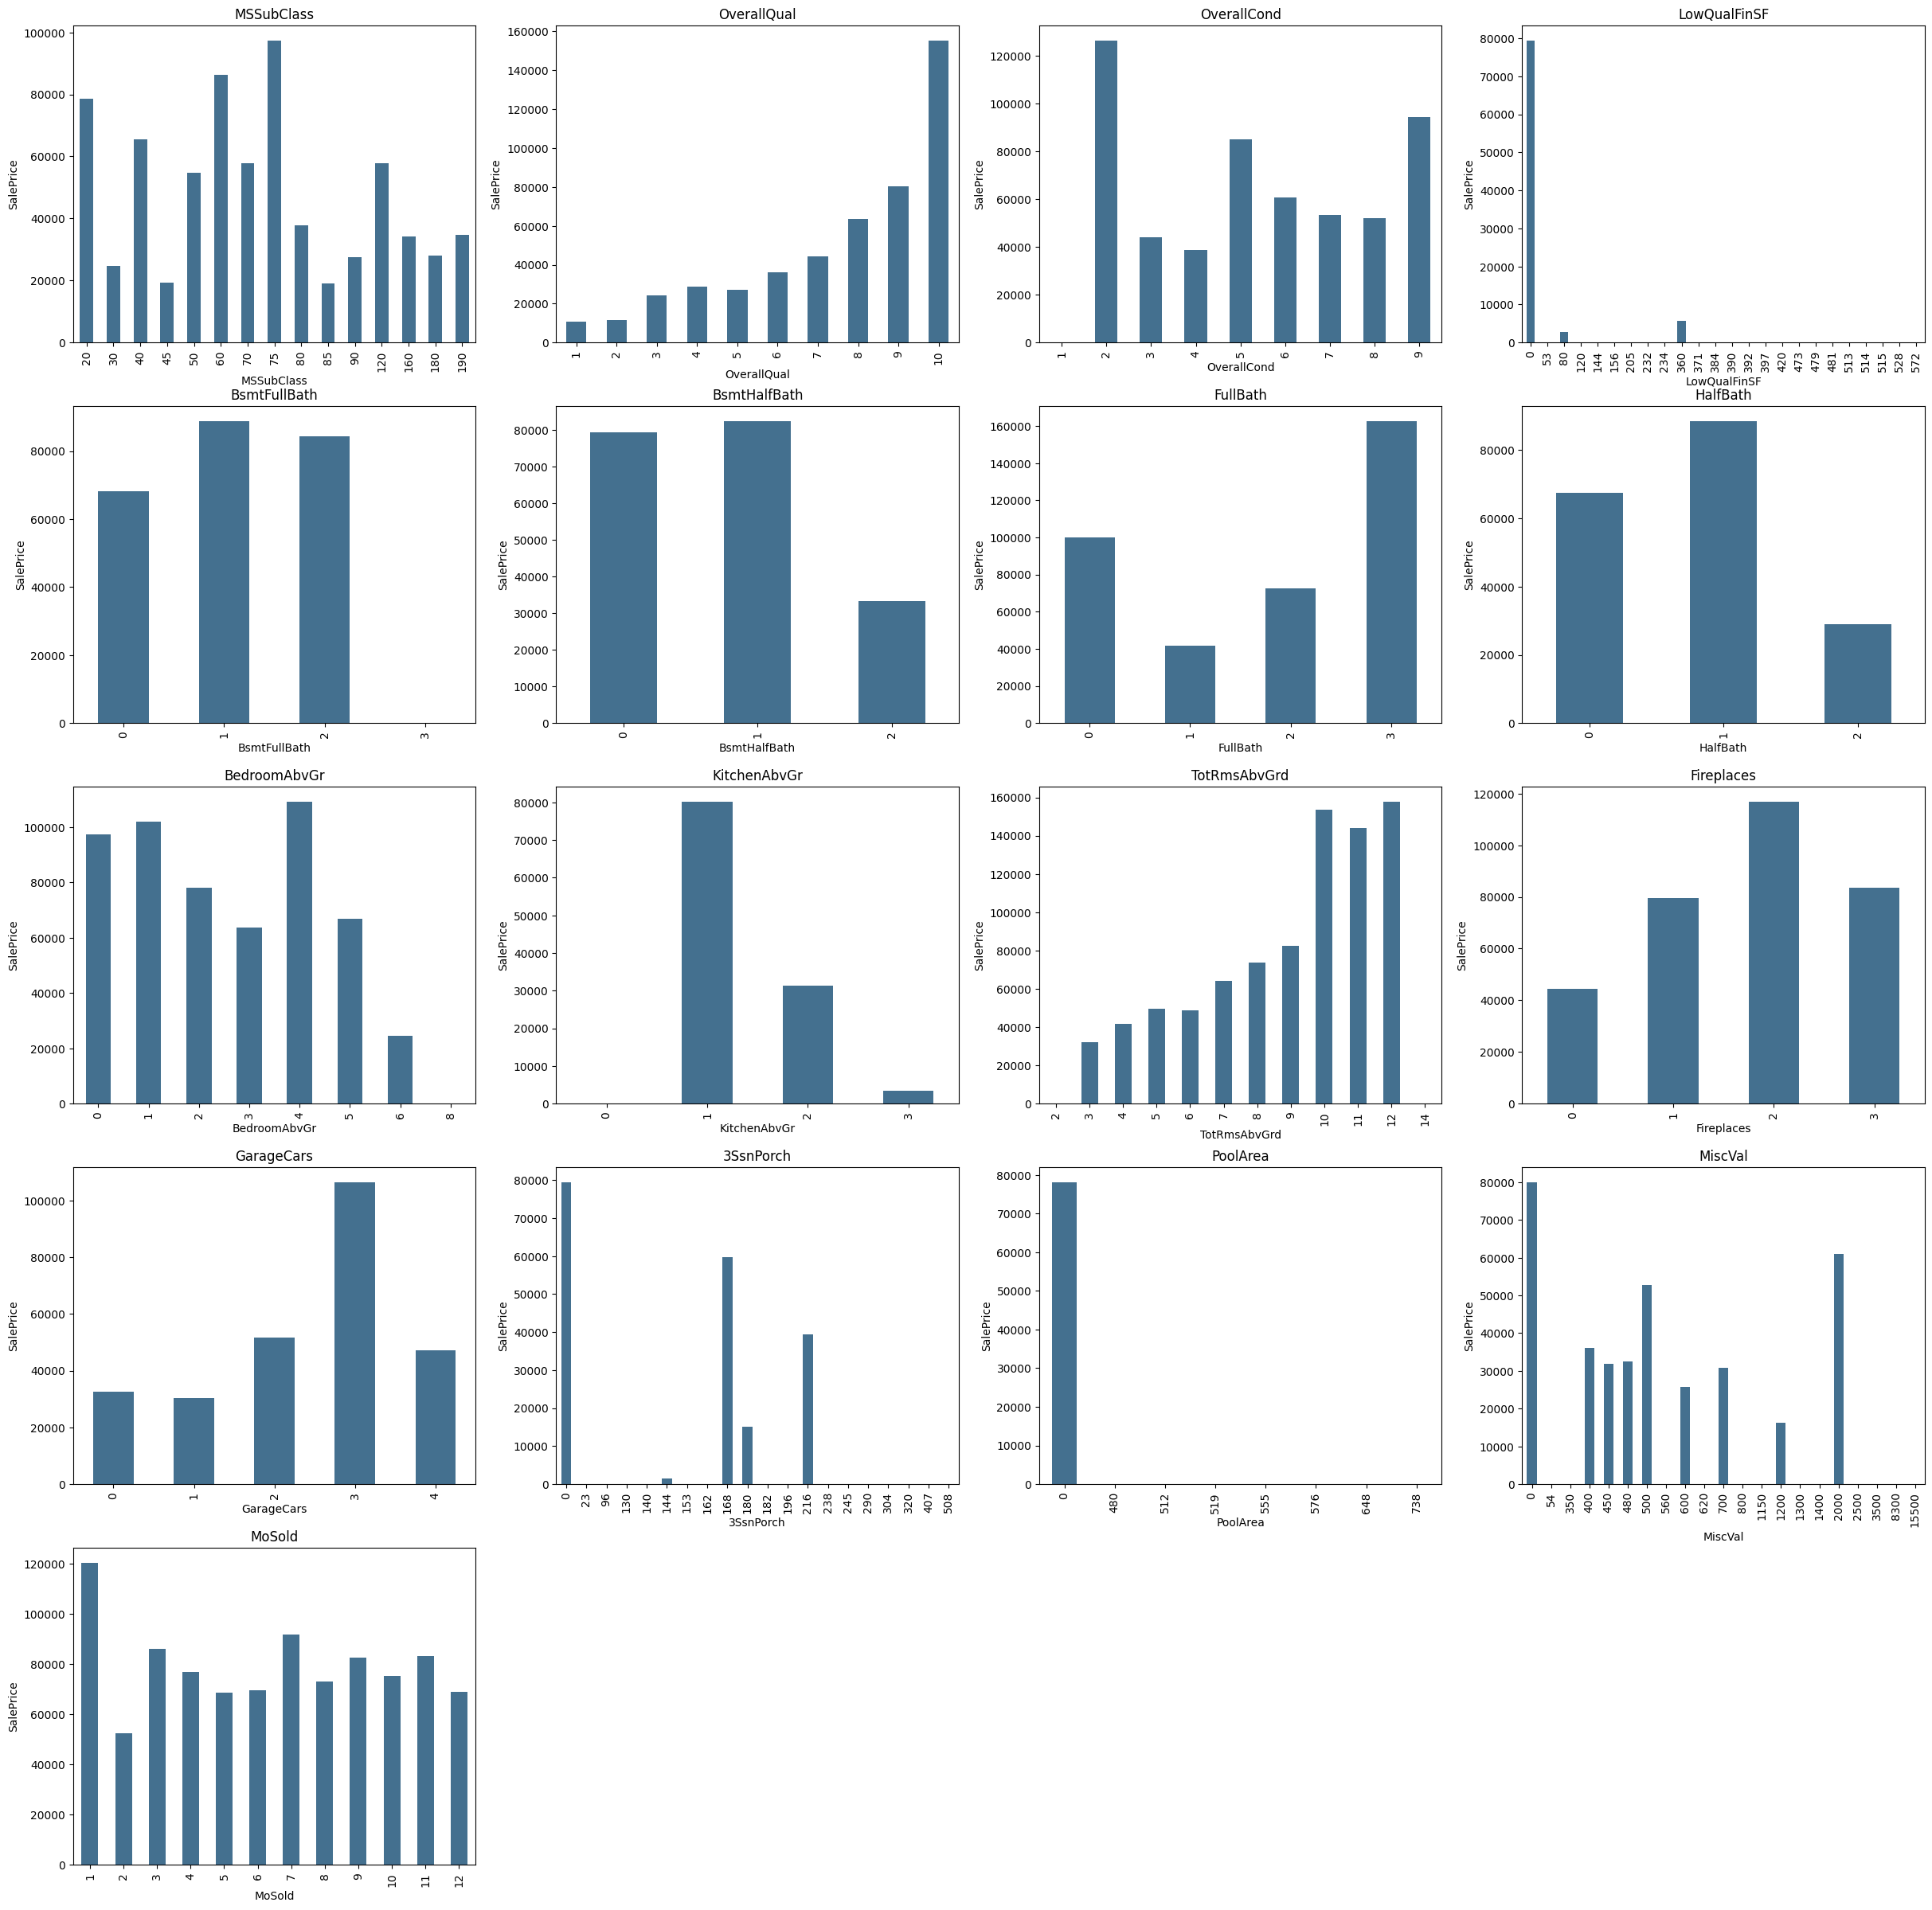

In [25]:
numerical_discrete = [
    col
    for col in numerical_columns
    if len(boston[col].unique()) < 25 and col not in Years
]

numerical_discrete_columns(numerical_discrete)

# Data Preprocessing


## 1.0 Feature Transforming


## 1.1 Removing Redundant Features


In [26]:
boston.shape, test.shape

((1460, 81), (1459, 80))

In [27]:
uneeded_columns = []

for column in boston.columns:
    percentage = boston[column].isna().sum() * 100 / len(boston)
    if percentage > 30:
        uneeded_columns.append([column, percentage])

uneeded_columns

[['Alley', 93.76712328767124],
 ['MasVnrType', 59.726027397260275],
 ['FireplaceQu', 47.26027397260274],
 ['PoolQC', 99.52054794520548],
 ['Fence', 80.75342465753425],
 ['MiscFeature', 96.3013698630137]]

##### i will remove those columns from both data sets


In [28]:
drop = []
for i, j in uneeded_columns:
    drop.append(i)

for dataset in combin:
    dataset.drop(columns=drop, axis=1, inplace=True)

boston.shape, test.shape

((1460, 75), (1459, 74))

## 1.2 Handling massing values


In [29]:
null_num_columns = []
null_cat_columns = []

for column in boston.columns:
    percentage = boston[column].isna().sum() * 100 / len(boston)
    if percentage > 0:
        if boston[column].dtype != "O":
            null_num_columns.append([column, percentage])
        else:
            null_cat_columns.append([column, percentage])

print(null_num_columns, "\n")
print(null_cat_columns)

[['LotFrontage', 17.73972602739726], ['MasVnrArea', 0.547945205479452], ['GarageYrBlt', 5.5479452054794525]] 

[['BsmtQual', 2.5342465753424657], ['BsmtCond', 2.5342465753424657], ['BsmtExposure', 2.6027397260273974], ['BsmtFinType1', 2.5342465753424657], ['BsmtFinType2', 2.6027397260273974], ['Electrical', 0.0684931506849315], ['GarageType', 5.5479452054794525], ['GarageFinish', 5.5479452054794525], ['GarageQual', 5.5479452054794525], ['GarageCond', 5.5479452054794525]]


In [30]:
num_columns = []
cat_columns = []
for i, j in null_num_columns:
    num_columns.append(i)

for i, j in null_cat_columns:
    cat_columns.append(i)


print(num_columns)
print()
print(cat_columns)

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


##### Stratege:

if the missing values in the column less than 3%, so i will fill it with mean (for numerical) or mode (for categorical)

otherwise, i will use linear models or decision tree to fill the missing values


##### 1.2.1 Numerical values (boston data set)


In [31]:
def fill_numerical_values_with_linear_model(dataset, column):

    data = dataset[[column, "SalePrice"]].copy()
    data[column] = data[column].fillna(-1)
    train = data[data[column] != -1]
    missied_data = pd.DataFrame(data[data[column] == -1]["SalePrice"])

    x_train, x_test, y_train, y_test = train_test_split(
        train.drop(columns=column, axis=1),
        train[column],
        train_size=0.01,
        random_state=42,
    )

    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)
    predction = list(lin_reg.predict(missied_data))

    def update(value):
        if value == -1:
            ret = int(predction[0])
            predction.pop(0)
            return ret
        return value

    dataset[column] = dataset[column].fillna(-1)
    dataset[column] = dataset[column].apply(update)

    return dataset[column]


def fill_numerical_values_with_mean(dataset=pd.DataFrame(), column=str):

    mean = dataset[column].mean()
    dataset[column] = dataset[column].fillna(mean)
    return dataset[column]


for column in num_columns:
    percentage = boston[column].isna().sum() * 100 / len(boston)

    if percentage <= 3:  # with mean
        boston[column] = fill_numerical_values_with_mean(boston, column)

    else:  # with model
        boston[column] = fill_numerical_values_with_linear_model(boston, column)

##### 1.2.2 Categorical values (boston data set)


In [32]:
def fill_numerical_values_with_RF_model(dataset, column):
    data = dataset[[column, "SalePrice"]].copy()
    data[column] = data[column].fillna("missied_data")
    train = data[data[column] != "missied_data"]
    missied_data = pd.DataFrame(data[data[column] == "missied_data"]["SalePrice"])

    x_train, x_test, y_train, y_test = train_test_split(
        train.drop(columns=column, axis=1),
        train[column],
        train_size=0.01,
        random_state=42,
    )

    RF = RandomForestClassifier(ccp_alpha=0.015)
    RF.fit(x_train, y_train)
    predction = list(RF.predict(missied_data))

    def update(value):
        if value == "missied_data":
            ret = predction[0]
            predction.pop(0)
            return ret
        return value

    dataset[column] = dataset[column].fillna("missied_data")
    dataset[column] = dataset[column].apply(update)

    return dataset[column]


def fill_numerical_values_with_mode(dataset, column):
    mode = dataset[column].mode()[0]
    dataset[column] = dataset[column].fillna(mode)
    return dataset[column]


for column in cat_columns:
    percentage = boston[column].isna().sum() * 100 / len(boston)

    if percentage <= 3:  # with mean
        boston[column] = fill_numerical_values_with_mode(boston, column)

    else:  # with model
        boston[column] = fill_numerical_values_with_RF_model(boston, column)

In [33]:
for i in boston.columns:
    if boston[i].isna().sum() > 0:
        print(i)

##### 1.2.3. Now lets fill data in test dataset


In [34]:
null_num_columns = []
null_cat_columns = []

for column in test.columns:
    percentage = test[column].isna().sum() * 100 / len(test)
    if percentage > 0:
        if test[column].dtype != "O":
            null_num_columns.append([column, percentage])
        else:
            null_cat_columns.append([column, percentage])

print(null_num_columns, "\n")
print(null_cat_columns)

[['LotFrontage', 15.558601782042494], ['MasVnrArea', 1.0281014393420151], ['BsmtFinSF1', 0.06854009595613433], ['BsmtFinSF2', 0.06854009595613433], ['BsmtUnfSF', 0.06854009595613433], ['TotalBsmtSF', 0.06854009595613433], ['BsmtFullBath', 0.13708019191226867], ['BsmtHalfBath', 0.13708019191226867], ['GarageYrBlt', 5.346127484578479], ['GarageCars', 0.06854009595613433], ['GarageArea', 0.06854009595613433]] 

[['MSZoning', 0.27416038382453733], ['Utilities', 0.13708019191226867], ['Exterior1st', 0.06854009595613433], ['Exterior2nd', 0.06854009595613433], ['BsmtQual', 3.015764222069911], ['BsmtCond', 3.0843043180260454], ['BsmtExposure', 3.015764222069911], ['BsmtFinType1', 2.8786840301576424], ['BsmtFinType2', 2.8786840301576424], ['KitchenQual', 0.06854009595613433], ['Functional', 0.13708019191226867], ['GarageType', 5.2090472926662095], ['GarageFinish', 5.346127484578479], ['GarageQual', 5.346127484578479], ['GarageCond', 5.346127484578479], ['SaleType', 0.06854009595613433]]


##### All columns has missing values with low percentage, so i will fill them with mean and mode


In [35]:
num_columns = []
cat_columns = []
for i, j in null_num_columns:
    num_columns.append(i)

for i, j in null_cat_columns:
    cat_columns.append(i)


print(num_columns)
print()
print(cat_columns)

['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']

['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'SaleType']


In [36]:
for column in cat_columns:
    test[column] = fill_numerical_values_with_mode(test, column)

for column in num_columns:
    test[column] = fill_numerical_values_with_mean(test, column)

In [37]:
boston.shape, test.shape

((1460, 75), (1459, 74))

## 1.3. Outliers


In [38]:
numirical_columns = []

for col in boston.columns:
    if boston[col].dtype != "O":
        numirical_columns.append(col)
numirical_columns.remove("SalePrice")
len(numirical_columns)

37

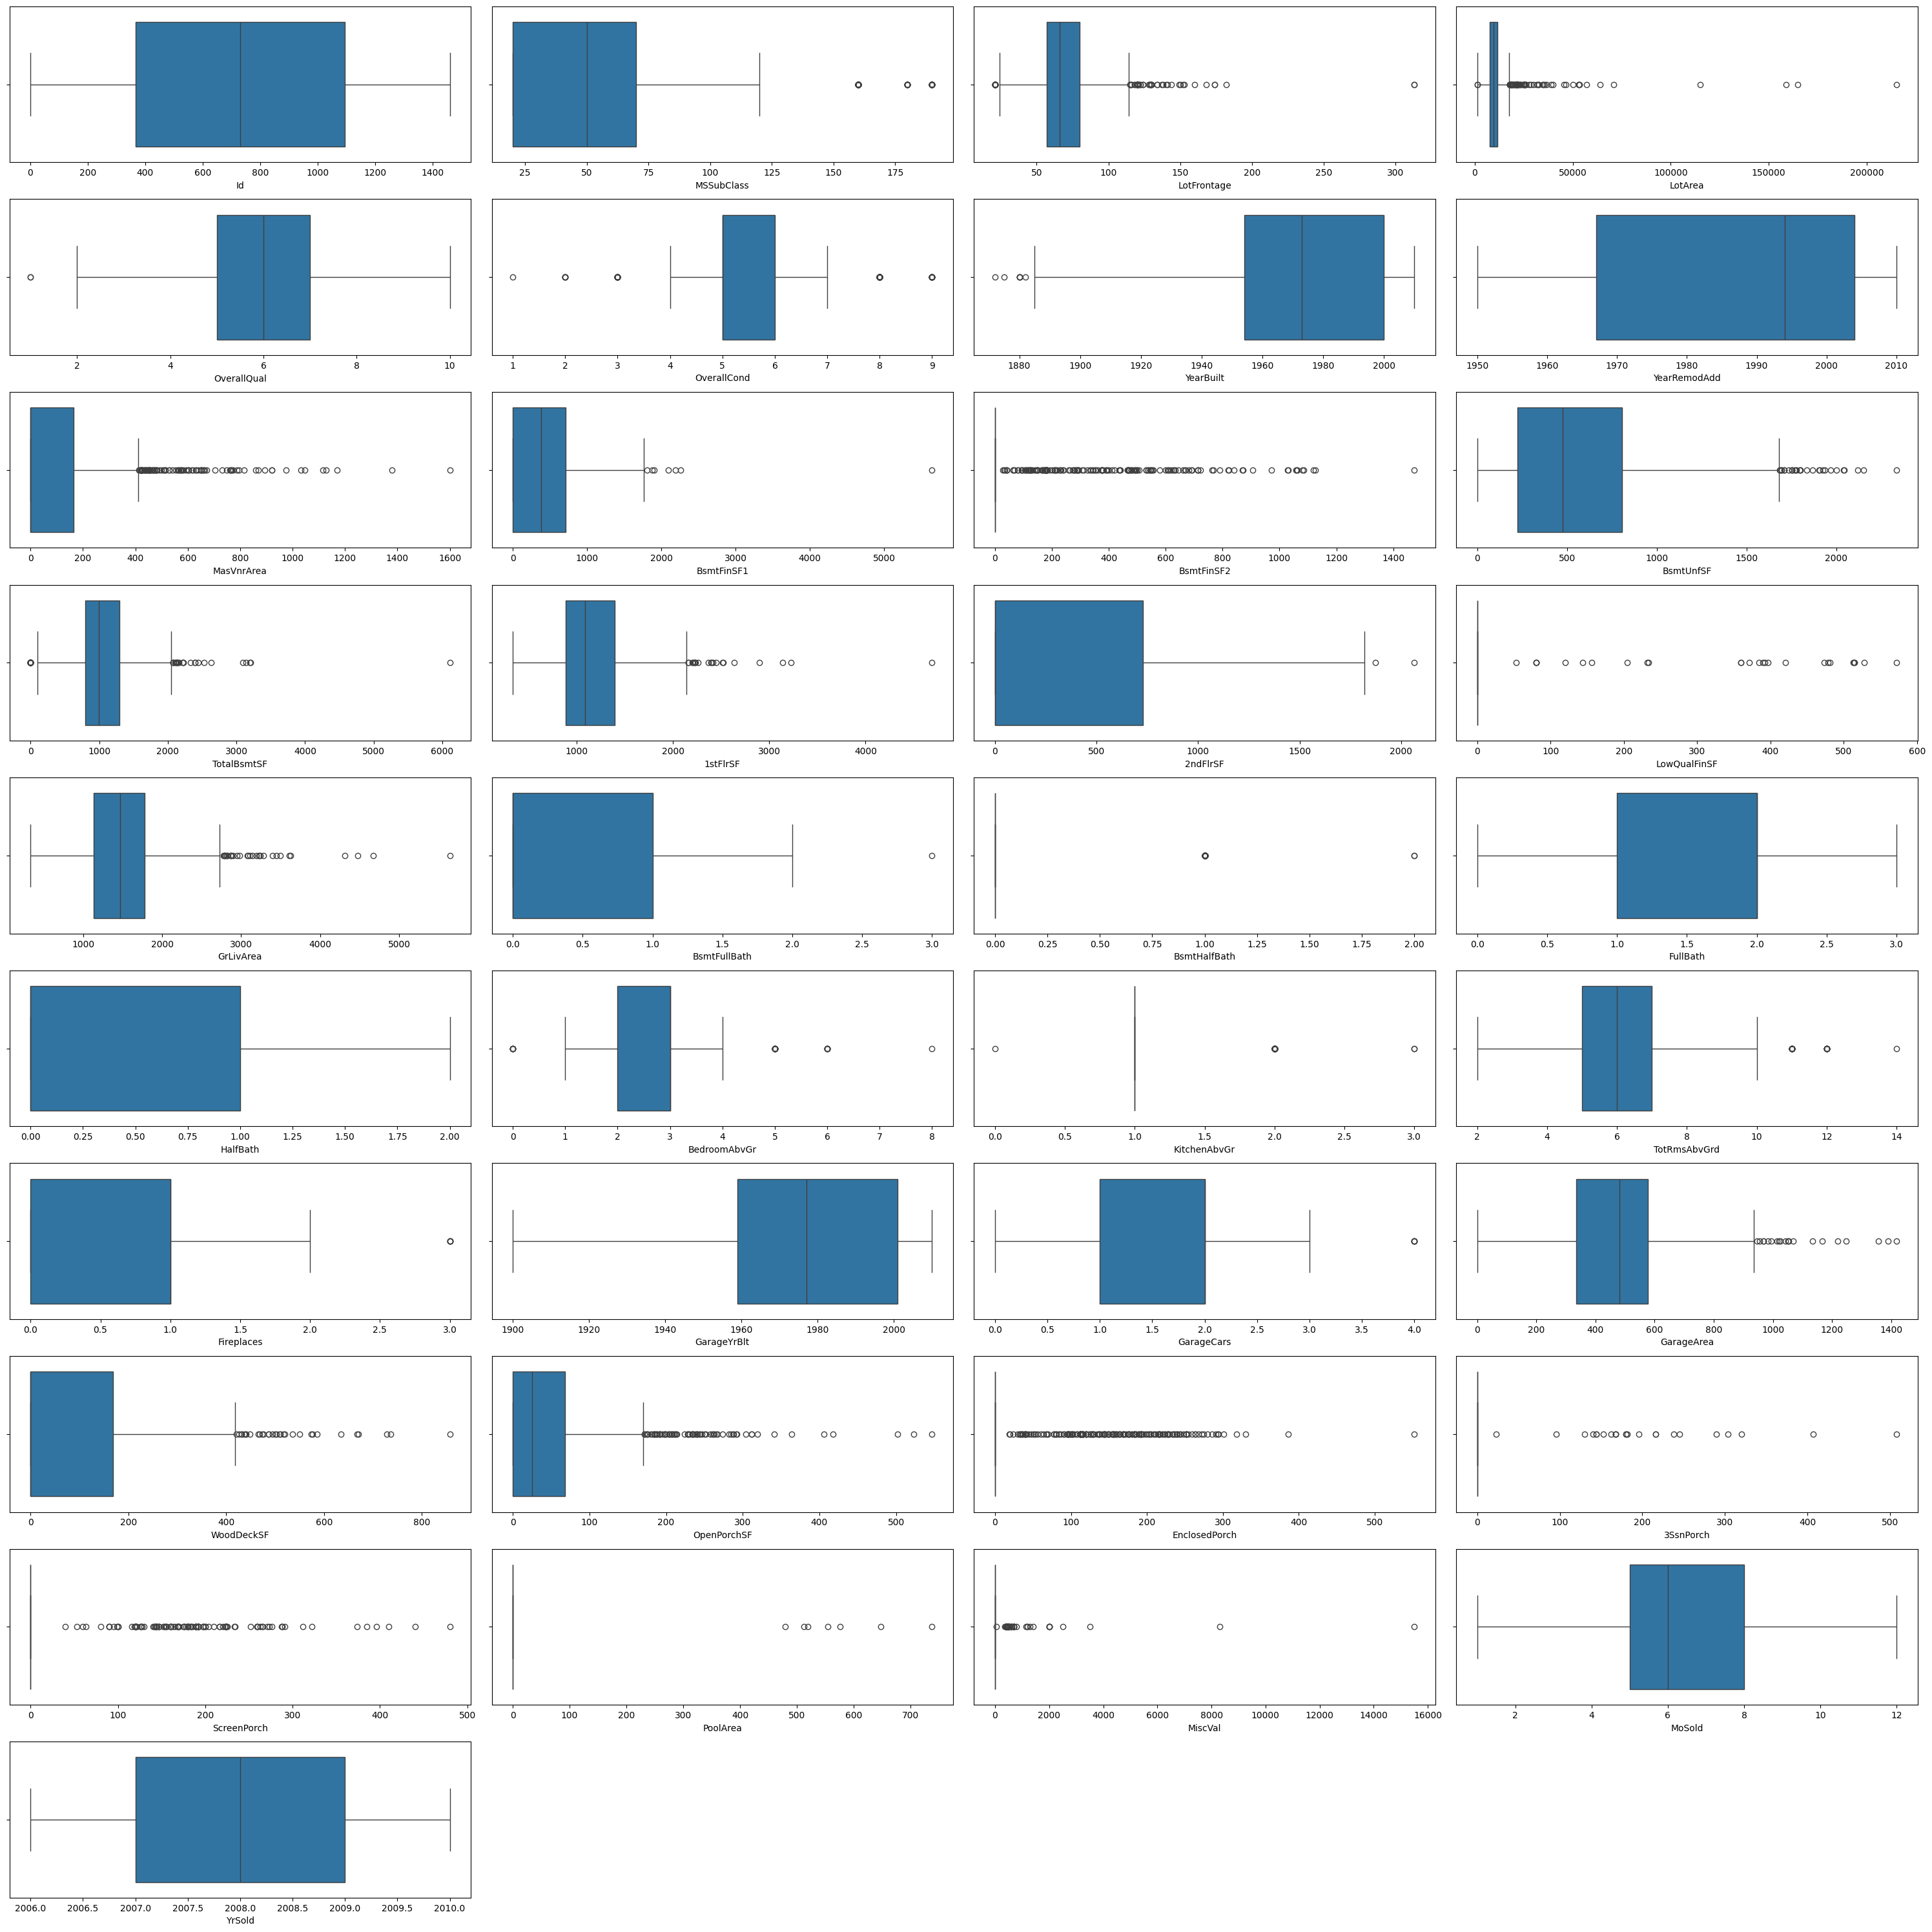

In [39]:
# fig, axs = plt.subplots(8, 5, figsize=(14, 15))
fig = plt.figure(figsize=(30, 30))

for j, i in enumerate(numirical_columns):
    plt.subplot(10, 4, j + 1)

    sns.boxplot(data=boston, x=i)
fig.tight_layout(pad=1.0)

plt.show()

##### i will remove outliers from

    ["LotFrontage", "LotArea", "BsmtFinSF1", "TotalBsmtSF", "GrLivArea"]


##### and from box plot above i will construct new columns, Totalarea, TotalBsmtFin, TotalSF, TotalBath, TotalPorch


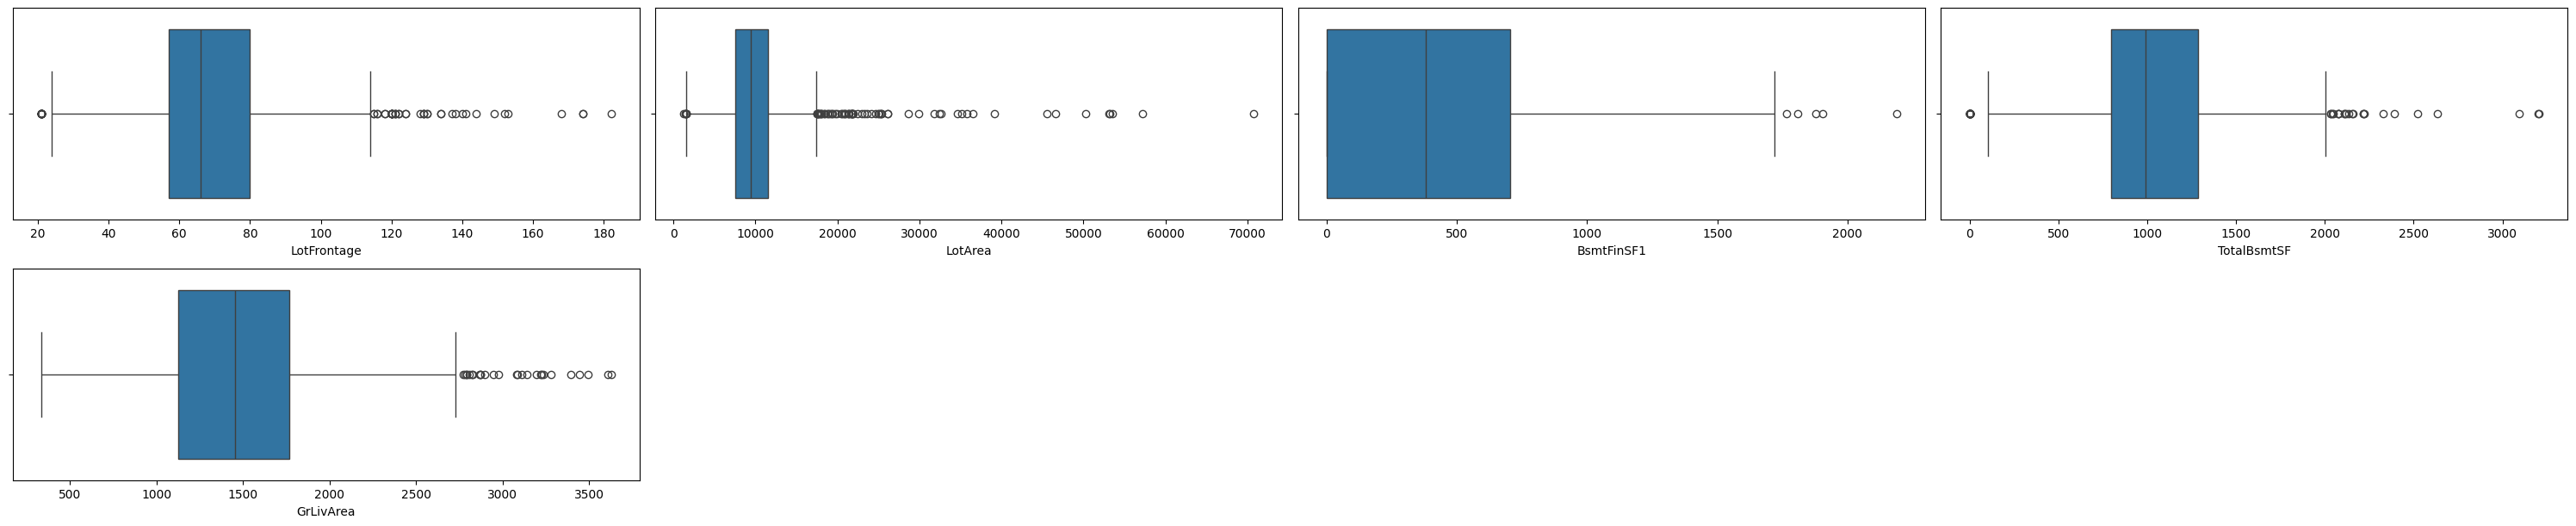

In [40]:
outliers_col = ["LotFrontage", "LotArea", "BsmtFinSF1", "TotalBsmtSF", "GrLivArea"]

boston = boston.drop(boston[boston["LotFrontage"] > 185].index)
boston = boston.drop(boston[boston["LotArea"] > 100000].index)
boston = boston.drop(boston[boston["BsmtFinSF1"] > 4000].index)
boston = boston.drop(boston[boston["TotalBsmtSF"] > 5000].index)
boston = boston.drop(boston[boston["GrLivArea"] > 4000].index)

fig = plt.figure(figsize=(30, 30))

for j, i in enumerate(outliers_col):
    plt.subplot(10, 4, j + 1)

    sns.boxplot(data=boston, x=i)
fig.tight_layout(pad=1.0)

plt.show()

In [41]:
boston.shape

(1451, 75)

# 2.0 Feature Construction


In [42]:
combin = [boston, test]

for dataset in combin:
    dataset["Totalarea"] = dataset["LotArea"] + dataset["LotFrontage"]
    dataset["TotalBsmtFin"] = dataset["BsmtFinSF1"] + dataset["BsmtFinSF2"]
    dataset["TotalSF"] = dataset["TotalBsmtSF"] + dataset["2ndFlrSF"]
    dataset["TotalBath"] = dataset["FullBath"] + dataset["HalfBath"]
    dataset["TotalPorch"] = (
        dataset["ScreenPorch"] + dataset["EnclosedPorch"] + dataset["OpenPorchSF"]
    )

#### convert them to Binay Columns


In [43]:
def update(val):
    if val > 0:
        return 1
    return 0


for dataset in combin:
    dataset["Totalarea"] = dataset["Totalarea"].apply(update)
    dataset["TotalBsmtFin"] = dataset["TotalBsmtFin"].apply(update)
    dataset["TotalSF"] = dataset["TotalSF"].apply(update)
    dataset["TotalBath"] = dataset["TotalBath"].apply(update)
    dataset["TotalPorch"] = dataset["Totalarea"].apply(update)

# 3.0 Feature Selection


In [44]:
removed_columns = set()
numirical_columns = []
categorical_columns = []

for col in boston.columns:
    if boston[col].dtype != "O":
        numirical_columns.append(col)
    else:
        categorical_columns.append(col)

numirical_columns.remove("SalePrice")

## 3.1. VarianceThreshold for numercal columns

for constant columns or columns with low variance (that has more than 80% of the samples)


In [45]:
presntage = 0.8 * (1 - 0.8)
X = boston[numirical_columns]
var = VarianceThreshold(threshold=presntage)
var.fit(X)

VarianceThreshold(threshold=0.15999999999999998)

In [46]:
boolean_selection = var.get_support()
columns_names = var.feature_names_in_

In [47]:
for i in range(len(boolean_selection)):
    if boolean_selection[i] == False:
        removed_columns.add(columns_names[i])

removed_columns

{'BsmtHalfBath',
 'KitchenAbvGr',
 'TotalBath',
 'TotalPorch',
 'TotalSF',
 'Totalarea'}

## 3.2. Correlations


<Axes: >

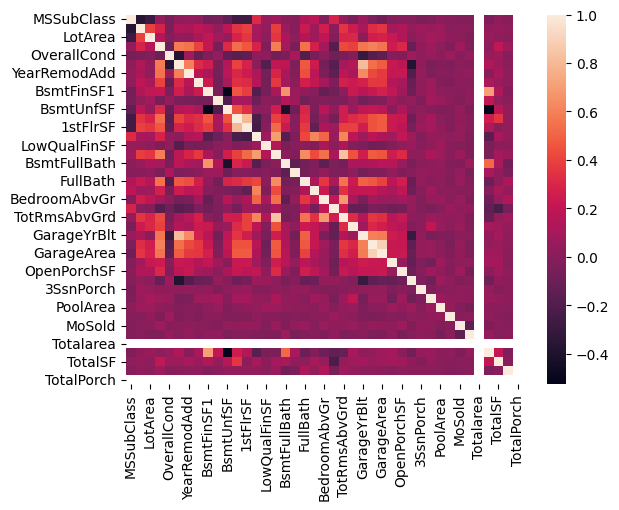

In [48]:
df = boston[numirical_columns].drop(columns=["Id"], axis=1)

corr = df.corr()

sns.heatmap(corr)

In [49]:
def remove_strong_corr(data_set, neg_corr, pos_corr):
    global removed_columns
    correlation = data_set.corr()

    for i in range(len(correlation.columns)):

        for j in range(i):
            corr_value = correlation.iloc[i, j]

            if corr_value < 0 and corr_value < neg_corr:
                print(correlation.columns[j], correlation.columns[i])
                removed_columns.add(correlation.columns[j])
            elif corr_value > 0 and corr_value > pos_corr:
                print(correlation.columns[j], correlation.columns[i])
                removed_columns.add(correlation.columns[j])

    return


remove_strong_corr(df, neg_corr=-0.4, pos_corr=0.8)
print(len(removed_columns))
print(removed_columns)

BsmtFinSF1 BsmtUnfSF
TotalBsmtSF 1stFlrSF
BsmtUnfSF BsmtFullBath
GrLivArea TotRmsAbvGrd
YearBuilt GarageYrBlt
GarageCars GarageArea
BsmtUnfSF TotalBsmtFin
12
{'TotalBsmtSF', 'Totalarea', 'YearBuilt', 'BsmtUnfSF', 'GarageCars', 'GrLivArea', 'TotalBath', 'KitchenAbvGr', 'BsmtHalfBath', 'TotalSF', 'TotalPorch', 'BsmtFinSF1'}


In [50]:
removed_columns.remove("GrLivArea")
removed_columns

{'BsmtFinSF1',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'GarageCars',
 'KitchenAbvGr',
 'TotalBath',
 'TotalBsmtSF',
 'TotalPorch',
 'TotalSF',
 'Totalarea',
 'YearBuilt'}

## 3.3. Chi2

for categorical columns


In [51]:
df = boston[categorical_columns]
df

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1455       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         CollgCr       Norm       Norm     1Fam     2Story     Gable   
1         Veenker      Feedr       Norm     1Fam     1Story     Gable   
2         CollgCr       Norm       Norm     1Fam     2Story     Gable   
3         Crawfor       Norm       Norm     1Fam     2Story     Gable   
4         NoRidge       Norm       Norm     1Fam     2Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1455      Gilbert       Norm       Norm     1Fam     2Story     Gable   
1456       NWAmes       Norm       Norm     1Fam     1Story     Gable   
1457      Crawfor       Norm       Norm     1Fam     2Story     Gable   
1458        NAmes       Norm       Norm     1Fam     1Story       Hip   
1459      Edwards       Norm       Norm     1Fam     1Story     Gable   

     RoofMatl Exterior1st Exterior2nd ExterQual ExterCond Foundation BsmtQual  \
0     CompShg     VinylSd     VinylSd        Gd        TA      PConc       Gd   
1     CompShg     MetalSd     MetalSd        TA        TA     CBlock       Gd   
2     CompShg     VinylSd     VinylSd        Gd        TA      PConc       Gd   
3     CompShg     Wd Sdng     Wd Shng        TA        TA     BrkTil       TA   
4     CompShg     VinylSd     VinylSd        Gd        TA      PConc       Gd   
...       ...         ...         ...       ...       ...        ...      ...   
1455  CompShg     VinylSd     VinylSd        TA        TA      PConc       Gd   
1456  CompShg     Plywood     Plywood        TA        TA     CBlock       Gd   
1457  CompShg     CemntBd     CmentBd        Ex        Gd      Stone       TA   
1458  CompShg     MetalSd     MetalSd        TA        TA     CBlock       TA   
1459  CompShg     HdBoard     HdBoard        Gd        TA     CBlock       TA   

     BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0          TA           No          GLQ          Unf    GasA        Ex   
1          TA           Gd          ALQ          Unf    GasA        Ex   
2          TA           Mn          GLQ          Unf    GasA        Ex   
3          Gd           No          ALQ          Unf    GasA        Gd   
4          TA           Av          GLQ          Unf    GasA        Ex   
...       ...          ...          ...          ...     ...       ...   
1455       TA           No          Unf          Unf    GasA        Ex   
1456       TA           No          ALQ          Rec    GasA        TA   
1457       Gd           No          GLQ          Unf    GasA        Ex   
1458       TA           Mn          GLQ          Rec    GasA        Gd   
1459       TA           No          BLQ          LwQ    GasA        Gd   

     CentralAir Electrical KitchenQual Functional GarageType GarageFinish  \
0             Y      SBrkr          Gd        Typ     Attchd          RFn   
1             Y      SBrkr          TA        Typ     Attchd          RFn   
2             Y      SBrkr          Gd        Typ     Attchd          RFn   
3             Y      SBrkr          Gd        Typ     Det

In [52]:
df.nunique()

MSZoning          5
Street            2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          7
Exterior1st      15
Exterior2nd      16
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
SaleType          9
SaleCondition     6
dtype: int64

In [53]:
ord = OrdinalEncoder()
ord.fit(df)
df[df.columns] = ord.transform(df)
df

/tmp/ipykernel_445241/1290922739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df.columns] = ord.transform(df)


MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  \
0          3.0     1.0       3.0          3.0        0.0        4.0   
1          3.0     1.0       3.0          3.0        0.0        2.0   
2          3.0     1.0       0.0          3.0        0.0        4.0   
3          3.0     1.0       0.0          3.0        0.0        0.0   
4          3.0     1.0       0.0          3.0        0.0        2.0   
...        ...     ...       ...          ...        ...        ...   
1455       3.0     1.0       3.0          3.0        0.0        4.0   
1456       3.0     1.0       3.0          3.0        0.0        4.0   
1457       3.0     1.0       3.0          3.0        0.0        4.0   
1458       3.0     1.0       3.0          3.0        0.0        4.0   
1459       3.0     1.0       3.0          3.0        0.0        4.0   

      LandSlope  Neighborhood  Condition1  Condition2  BldgType  HouseStyle  \
0           0.0           5.0         2.0         2.0       0.0         5.0   
1           0.0          24.0         1.0         2.0       0.0         2.0   
2           0.0           5.0         2.0         2.0       0.0         5.0   
3           0.0           6.0         2.0         2.0       0.0         5.0   
4           0.0          15.0         2.0         2.0       0.0         5.0   
...         ...           ...         ...         ...       ...         ...   
1455        0.0           8.0         2.0         2.0       0.0         5.0   
1456        0.0          14.0         2.0         2.0       0.0         2.0   
1457        0.0           6.0         2.0         2.0       0.0         5.0   
1458        0.0          12.0         2.0         2.0       0.0         2.0   
1459        0.0           7.0         2.0         2.0       0.0         2.0   

      RoofStyle  RoofMatl  Exterior1st  Exterior2nd  ExterQual  ExterCond  \
0           1.0       0.0         12.0         13.0        2.0        4.0   
1           1.0       0.0          8.0          8.0        3.0        4.0   
2           1.0       0.0         12.0         13.0        2.0        4.0   
3           1.0       0.0         13.0         15.0        3.0        4.0   
4           1.0       0.0         12.0         13.0        2.0        4.0   
...         ...       ...          ...          ...        ...        ...   
1455        1.0       0.0         12.0         13.0        3.0        4.0   
1456        1.0       0.0          9.0         10.0        3.0        4.0   
1457        1.0       0.0          5.0          5.0        0.0        2.0   
1458        3.0       0.0          8.0          8.0        3.0        4.0   
1459        1.0       0.0          6.0          6.0        2.0        4.0   

      Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0            2.0       2.0       3.0           3.0           2.0   
1            1.0       2.0       3.0           1.0           0.0   
2            2.0       2.0       3.0           2.0           2.0   
3            0.0       3.0       1.0           3.0           0.0   
4            2.0       2.0       3.0           0.0           2.0   
...          ...       ...       ...           ...           ...   
1455         2.0       2.0       3.0           3.0           5.0   
1456         1.0       2.0       3.0           3.0           0.0   
1457         4.0       3.0       1.0           3.0           2.0   
1458         1.0       3.0       3.0           2.0           2.0   
1459         1.0       3.0       3.0           3.0           1.0   

      BsmtFinType2  Heating  HeatingQC  CentralAir  Electrical  KitchenQual  \
0              5.0      1.0        0.0         1.0         4.0          2.0   
1              5.0      1.0        0.0         1.0         4.0          3.0   
2              5.0      1.0        0.0         1.0         4.0          2.0   
3              5.0      1.0        2.0         1.0         4.0          2.0   
4              5.0      1.0        0.0         1.0         4.0     

In [54]:
X = df
Y = boston["SalePrice"]

chi_state, p_value = chi2(X, Y)

needed_column = 0
column_names = []
columns = list(X.columns)


for i in range(len(p_value)):
    if p_value[i] <= 0.05:
        needed_column += 1
        column_names.append(columns[i])
        removed_columns.add(columns[i])

print("all columns = ", len(p_value))
print("needed column = ", needed_column)
print("the columns i will take : ", column_names)
print("number of removed columns :", len(removed_columns))
print("removed columns are :", removed_columns)

all columns =  37
needed column =  10
the columns i will take :  ['LotShape', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofMatl', 'Exterior2nd', 'BsmtFinType1', 'HeatingQC', 'GarageType']
number of removed columns : 21
removed columns are : {'TotalBsmtSF', 'BldgType', 'TotalSF', 'LandSlope', 'Totalarea', 'BsmtUnfSF', 'GarageCars', 'Neighborhood', 'GarageType', 'RoofMatl', 'KitchenAbvGr', 'BsmtHalfBath', 'Exterior2nd', 'BsmtFinSF1', 'LotShape', 'HouseStyle', 'HeatingQC', 'YearBuilt', 'BsmtFinType1', 'TotalBath', 'TotalPorch'}


## 3.4. VarianceThreshold for categorical columns

for constant columns or columns with low variance (that has more than 80% of the samples)


In [55]:
presntage = 0.8 * (1 - 0.8)
X = df
var = VarianceThreshold(threshold=presntage)
var.fit(X)

VarianceThreshold(threshold=0.15999999999999998)

In [56]:
boolean_selection = var.get_support()
columns_names = var.feature_names_in_
print(boolean_selection)
print()
print(columns_names)

[ True False  True  True False  True False  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True False  True  True  True  True  True  True  True  True  True
  True]

['MSZoning' 'Street' 'LotShape' 'LandContour' 'Utilities' 'LotConfig'
 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2' 'BldgType'
 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC' 'CentralAir'
 'Electrical' 'KitchenQual' 'Functional' 'GarageType' 'GarageFinish'
 'GarageQual' 'GarageCond' 'PavedDrive' 'SaleType' 'SaleCondition']


In [57]:
for i in range(len(boolean_selection)):
    if boolean_selection[i] == False:
        removed_columns.add(columns_names[i])

print(len(removed_columns))
print((removed_columns))

26
{'TotalBsmtSF', 'Heating', 'BldgType', 'CentralAir', 'TotalSF', 'LandSlope', 'Totalarea', 'BsmtUnfSF', 'GarageCars', 'Neighborhood', 'Street', 'GarageType', 'Condition2', 'RoofMatl', 'KitchenAbvGr', 'BsmtHalfBath', 'Exterior2nd', 'BsmtFinSF1', 'LotShape', 'HouseStyle', 'HeatingQC', 'YearBuilt', 'BsmtFinType1', 'TotalBath', 'Utilities', 'TotalPorch'}


## 3.5. remove columns that have same value more than 95 %


In [58]:
for col in boston.columns:
    count = boston[col].value_counts().sort_values(ascending=False)
    top_value_count = count.iloc[0]
    if top_value_count * 100 / len(boston) > 85:
        removed_columns.add(col)

print(len(removed_columns))
print()
print((removed_columns))

44

{'LowQualFinSF', '3SsnPorch', 'TotalBsmtSF', 'MiscVal', 'Heating', 'LandContour', 'BldgType', 'SaleType', 'CentralAir', 'EnclosedPorch', 'GarageCond', 'TotalSF', 'LandSlope', 'Totalarea', 'Functional', 'BsmtUnfSF', 'GarageCars', 'Neighborhood', 'GarageQual', 'BsmtCond', 'Street', 'GarageType', 'Electrical', 'Condition2', 'PoolArea', 'BsmtFinType2', 'ScreenPorch', 'RoofMatl', 'KitchenAbvGr', 'BsmtHalfBath', 'Exterior2nd', 'PavedDrive', 'BsmtFinSF1', 'LotShape', 'HouseStyle', 'ExterCond', 'HeatingQC', 'BsmtFinSF2', 'YearBuilt', 'BsmtFinType1', 'TotalBath', 'Condition1', 'Utilities', 'TotalPorch'}


In [59]:
removed_columns.remove("TotalBath")
removed_columns.remove("TotalSF")
removed_columns.remove("TotalBsmtSF")
removed_columns.remove("TotalPorch")
removed_columns.remove("Totalarea")


combin = [boston, test]


for dataset in combin:
    dataset.drop(columns=list(removed_columns), axis=1, inplace=True)
boston.shape, test.shape

((1451, 41), (1459, 40))

# 4.0 log SalePrice to fix skew


In [60]:
boston["SalePrice"].skew()

1.5803037060213119

<Axes: xlabel='SalePrice', ylabel='Count'>

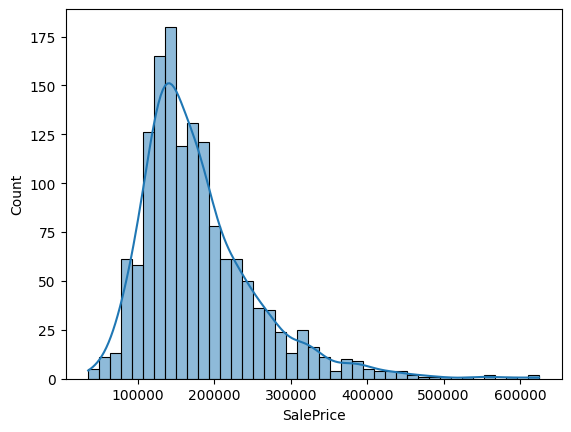

In [61]:
sns.histplot(boston["SalePrice"], kde=True)

<Axes: xlabel='SalePrice', ylabel='Count'>

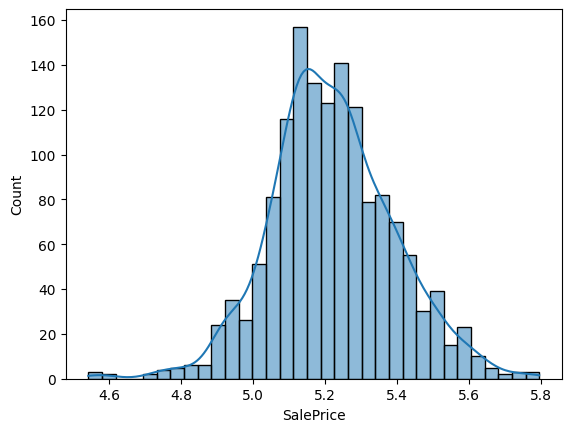

In [62]:
sns.histplot(np.log10(boston["SalePrice"]), kde=True)

In [63]:
boston["SalePrice"] = np.log10(boston["SalePrice"])

In [64]:
print(
    boston["SalePrice"].skew(),
    " ",
    boston["SalePrice"].mean(),
    " ",
    boston["SalePrice"].std(),
)

0.06888165765813446   5.220281457482235   0.1717357713096004


# 5.0 Dummy dataset


In [65]:
boston = pd.get_dummies(boston, drop_first=True)
boston.head(2)

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0   1          60         65.0     8450            7            5   
1   2          20         80.0     9600            6            8   

   YearRemodAdd  MasVnrArea  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0          2003       196.0          856       856       854       1710   
1          1976         0.0         1262      1262         0       1262   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  \
0             1         2         1             3             8           0   
1             0         2         0             3             6           1   

   GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  MoSold  YrSold  \
0       2003.0         548           0           61       2    2008   
1       1976.0         460         298            0       5    2007   

   SalePrice  Totalarea  TotalBsmtFin  TotalSF  TotalBath  TotalPorch  \
0   5.319106          1             1        1          1           1   
1   5.258877          1             1        1          1           1   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotConfig_CulDSac  \
0        False        False         True        False              False   
1        False        False         True        False              False   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  RoofStyle_Gable  \
0          False          False              True             True   
1           True          False             False             True   

   RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  \
0              False          False              False           False   
1              False          False              False           False   

   Exterior1st_AsphShn  Exterior1st_BrkComm  Exterior1st_BrkFace  \
0                False                False                False   
1                False                False                False   

   Exterior1st_CBlock  Exterior1st_CemntBd  Exterior1st_HdBoard  \
0               False                False                False   
1               False                False                False   

   Exterior1st_ImStucc  Exterior1st_MetalSd  Exterior1st_Plywood  \
0                False                False                False   
1                False                 True                False   

   Exterior1st_Stone  Exterior1st_Stucco  Exterior1st_VinylSd  \
0              False               False                 True   
1              False               False                False   

   Exterior1st_Wd Sdng  Exterior1st_WdShing  ExterQual_Fa  ExterQual_Gd  \
0                False                False         False          True   
1                False                False         False         False   

   ExterQual_TA  Foundation_CBlock  Foundation_PConc  Foundation_Slab  \
0         False              False              True            False   
1          True               True             False            False   

   Foundation_Stone  Foundation_Wood  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_TA  \
0             False            False        False         True        False   
1             False            False        False         True        False   

   BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  KitchenQual_Fa  \
0            False            False             True           False   
1             True            False            False           False   

   KitchenQual_Gd  KitchenQual_TA  GarageFinish_RFn  GarageFinish_Unf  \
0            True           False              True             False   
1           False            True              True             False   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                  False                 False                 False   
1                  False                 False                 False   

   SaleCondition_Normal  SaleCondition_Partial  
0                  True                

In [66]:
test = pd.get_dummies(test, drop_first=True)
test.head(2)

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0  1461          20         80.0    11622            5            6   
1  1462          20         81.0    14267            6            6   

   YearRemodAdd  MasVnrArea  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0          1961         0.0        882.0       896         0        896   
1          1958       108.0       1329.0      1329         0       1329   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  \
0           0.0         1         0             2             5           0   
1           0.0         1         1             3             6           0   

   GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  MoSold  YrSold  \
0       1961.0       730.0         140            0       6    2010   
1       1958.0       312.0         393           36       6    2010   

   Totalarea  TotalBsmtFin  TotalSF  TotalBath  TotalPorch  MSZoning_FV  \
0          1             1        1          1           1        False   
1          1             1        1          1           1        False   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  LotConfig_CulDSac  LotConfig_FR2  \
0         True        False        False              False          False   
1        False         True        False              False          False   

   LotConfig_FR3  LotConfig_Inside  RoofStyle_Gable  RoofStyle_Gambrel  \
0          False              True             True              False   
1          False             False            False              False   

   RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  Exterior1st_AsphShn  \
0          False              False           False                False   
1           True              False           False                False   

   Exterior1st_BrkComm  Exterior1st_BrkFace  Exterior1st_CBlock  \
0                False                False               False   
1                False                False               False   

   Exterior1st_CemntBd  Exterior1st_HdBoard  Exterior1st_MetalSd  \
0                False                False                False   
1                False                False                False   

   Exterior1st_Plywood  Exterior1st_Stucco  Exterior1st_VinylSd  \
0                False               False                 True   
1                False               False                False   

   Exterior1st_Wd Sdng  Exterior1st_WdShing  ExterQual_Fa  ExterQual_Gd  \
0                False                False         False         False   
1                 True                False         False         False   

   ExterQual_TA  Foundation_CBlock  Foundation_PConc  Foundation_Slab  \
0          True               True             False            False   
1          True               True             False            False   

   Foundation_Stone  Foundation_Wood  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_TA  \
0             False            False        False        False         True   
1             False            False        False        False         True   

   BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_No  KitchenQual_Fa  \
0            False            False             True           False   
1            False            False             True           False   

   KitchenQual_Gd  KitchenQual_TA  GarageFinish_RFn  GarageFinish_Unf  \
0           False            True             False              True   
1            True           False             False              True   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                  False                 False                 False   
1                  False                 False                 False   

   SaleCondition_Normal  SaleCondition_Partial  
0                  True                  False  
1                  True                  False

In [67]:
boston.shape, test.shape

((1451, 81), (1459, 78))

In [68]:
mp = {}

for i in boston.columns:
    if i in mp:
        mp[i] += 1
    else:
        mp[i] = 1
for i in test.columns:
    if i in mp:
        mp[i] += 1
    else:
        mp[i] = 1

for i, j in mp.items():
    if j != 2:
        print(i)

SalePrice
Exterior1st_ImStucc
Exterior1st_Stone


In [69]:
test["Exterior1st_ImStucc"] = False
test["Exterior1st_Stone"] = False

In [70]:
boston.shape, test.shape

((1451, 81), (1459, 80))

In [71]:
final_test = pd.DataFrame()
for col in boston.columns:
    if col != "SalePrice":
        final_test[col] = test[col]
test = final_test

In [72]:
for col in boston.columns:
    if boston[col].dtype == "bool":
        boston[col] = boston[col].astype("int32")

for col in test.columns:
    if test[col].dtype == "bool":
        test[col] = test[col].astype("int32")

In [73]:
boston

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearRemodAdd  MasVnrArea  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0             2003       196.0          856       856       854       1710   
1             1976         0.0         1262      1262         0       1262   
2             2002       162.0          920       920       866       1786   
3             1970         0.0          756       961       756       1717   
4             2000       350.0         1145      1145      1053       2198   
...            ...         ...          ...       ...       ...        ...   
1455          2000         0.0          953       953       694       1647   
1456          1988       119.0         1542      2073         0       2073   
1457          2006         0.0         1152      1188      1152       2340   
1458          1996         0.0         1078      1078         0       1078   
1459          1965         0.0         1256      1256         0       1256   

      BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  \
0                1         2         1             3             8   
1                0         2         0             3             6   
2                1         2         1             3             6   
3                1         1         0             3             7   
4                1         2         1             4             9   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             7   
1456             1         2         0             3             7   
1457             0         2         0             4             9   
1458             1         1         0             2             5   
1459             1         1         1             3             6   

      Fireplaces  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  MoSold  \
0              0       2003.0         548           0           61       2   
1              1       1976.0         460         298            0       5   
2              1       2001.0         608           0           42       9   
3              1       1998.0         642           0           35       2   
4              1       2000.0         836         192           84      12   
...          ...          ...         ...         ...          ...     ...   
1455           1       1999.0         460           0           40       8   
1456           2       1978.0         500         349            0       2   
1457           2       1941.0         252           0           60       5   
1458           0       1950.0         240         366            0       4   
1459           0       1965.0         276         736           68       6   

      YrSold  SalePrice  Totalarea  TotalBsmtFin  TotalSF  TotalBath  \
0       2008   5.319106          1             1        1          1   
1       2007   5.258877          1             1        1          1   
2       2008   5.349278          1             1        1          1   
3       2006   5.146128          1             1        1          1   
4       2008   5.397940          1          

In [74]:
test

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     1461          20         80.0    11622            5            6   
1     1462          20         81.0    14267            6            6   
2     1463          60         74.0    13830            5            5   
3     1464          60         78.0     9978            6            6   
4     1465         120         43.0     5005            8            5   
...    ...         ...          ...      ...          ...          ...   
1454  2915         160         21.0     1936            4            7   
1455  2916         160         21.0     1894            4            5   
1456  2917          20        160.0    20000            5            7   
1457  2918          85         62.0    10441            5            5   
1458  2919          60         74.0     9627            7            5   

      YearRemodAdd  MasVnrArea  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0             1961         0.0        882.0       896         0        896   
1             1958       108.0       1329.0      1329         0       1329   
2             1998         0.0        928.0       928       701       1629   
3             1998        20.0        926.0       926       678       1604   
4             1992         0.0       1280.0      1280         0       1280   
...            ...         ...          ...       ...       ...        ...   
1454          1970         0.0        546.0       546       546       1092   
1455          1970         0.0        546.0       546       546       1092   
1456          1996         0.0       1224.0      1224         0       1224   
1457          1992         0.0        912.0       970         0        970   
1458          1994        94.0        996.0       996      1004       2000   

      BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  \
0              0.0         1         0             2             5   
1              0.0         1         1             3             6   
2              0.0         2         1             3             6   
3              0.0         2         1             3             7   
4              0.0         2         0             2             5   
...            ...       ...       ...           ...           ...   
1454           0.0         1         1             3             5   
1455           0.0         1         1             3             6   
1456           1.0         1         0             4             7   
1457           0.0         1         0             3             6   
1458           0.0         2         1             3             9   

      Fireplaces  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  MoSold  \
0              0  1961.000000       730.0         140            0       6   
1              0  1958.000000       312.0         393           36       6   
2              1  1997.000000       482.0         212           34       3   
3              1  1998.000000       470.0         360           36       6   
4              0  1992.000000       506.0           0           82       1   
...          ...          ...         ...         ...          ...     ...   
1454           0  1977.721217         0.0           0            0       6   
1455           0  1970.000000       286.0           0           24       4   
1456           1  1960.000000       576.0         474            0       9   
1457           0  1977.721217         0.0          80           32       7   
1458           1  1993.000000       650.0         190           48      11   

      YrSold  Totalarea  TotalBsmtFin  TotalSF  TotalBath  TotalPorch  \
0       2010          1             1        1          1           1   
1       2010          1             1        1          1           1   
2       2010          1             1        1          1           1   
3       2010          1             1        1          1           1   
4       2010          1             1  

# Models


In [75]:
ids = test["Id"]
data = {
    "model": [],
    "MAE": [],
    "MSE": [],
    "RMSE": [],
    "train_score": [],
    "test_score": [],
}
models = pd.DataFrame(columns=data)

boston = boston.drop(columns=["Id"], axis=1)
test = test.drop(columns=["Id"], axis=1)

## 1.0 spliting data


In [76]:
x_train, x_test, y_train, y_test = train_test_split(
    boston.drop(columns=["SalePrice"]),
    boston["SalePrice"],
    test_size=0.3,
    random_state=42,
)

## 2.0 Linear model


In [77]:
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [78]:
lin_reg.fit(x_train, y_train)
train_prediction = lin_reg.predict(x_train)
test_prediction = lin_reg.predict(x_test)

score_train = r2_score(y_true=y_train, y_pred=train_prediction)

score_test = r2_score(y_true=y_test, y_pred=test_prediction)
print("train score = ", score_train)
print("test score = ", score_test)

train score =  0.924998365425324
test score =  0.8944045294708409


In [79]:
MAE = mean_absolute_error(y_true=y_test, y_pred=test_prediction)
MSE = mean_squared_error(y_true=y_test, y_pred=test_prediction)
RMSE = np.sqrt(mean_absolute_error(y_true=y_test, y_pred=test_prediction))
print("MAE = ", MAE)
print("MSE = ", MSE)
print("RMSE = ", RMSE)
print("acc_score = ", score_test)

MAE =  0.03949278572036071
MSE =  0.003132484814968814
RMSE =  0.19872791882460983
acc_score =  0.8944045294708409


In [80]:
data = {
    "model": "lin reg",
    "MAE": MAE,
    "MSE": MSE,
    "RMSE": RMSE,
    "train_score": score_train,
    "test_score": score_test,
}
models.loc[len(models)] = data
models

model       MAE       MSE      RMSE  train_score  test_score
0  lin reg  0.039493  0.003132  0.198728     0.924998    0.894405

## 3.0 Linear scaled model


In [81]:
pip = Pipeline(
    [
        ("Scaling", StandardScaler()),
        ("LinearRegression", LinearRegression(positive=True)),
    ]
)
pip.fit(x_train, y_train)

Pipeline(steps=[('Scaling', StandardScaler()),
                ('LinearRegression', LinearRegression(positive=True))])

In [82]:
train_prediction = pip.predict(x_train)
test_prediction = pip.predict(x_test)

score_train = r2_score(y_true=y_train, y_pred=train_prediction)

score_test = r2_score(y_true=y_test, y_pred=test_prediction)
print("train score = ", score_train)
print("test score = ", score_test)

train score =  0.9194441955607143
test score =  0.8900325540347777


In [83]:
MAE = mean_absolute_error(y_true=y_test, y_pred=test_prediction)
MSE = mean_squared_error(y_true=y_test, y_pred=test_prediction)
RMSE = np.sqrt(mean_absolute_error(y_true=y_test, y_pred=test_prediction))
print("MAE = ", MAE)
print("MSE = ", MSE)
print("RMSE = ", RMSE)
print("acc_score = ", score_test)

MAE =  0.04012239467011572
MSE =  0.0032621792667881545
RMSE =  0.20030575296310318
acc_score =  0.8900325540347777


In [84]:
data = {
    "model": "lin reg scaled",
    "MAE": MAE,
    "MSE": MSE,
    "RMSE": RMSE,
    "train_score": score_train,
    "test_score": score_test,
}
models.loc[len(models)] = data
models

model       MAE       MSE      RMSE  train_score  test_score
0         lin reg  0.039493  0.003132  0.198728     0.924998    0.894405
1  lin reg scaled  0.040122  0.003262  0.200306     0.919444    0.890033

## 4.0 Ridge


In [85]:
param_grid = {"alpha": [0.1, 0.2, 0.8, 1, 1.5, 2, 4, 5, 6.5, 8, 10, 15, 20]}

ridge = Ridge()


optimized_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=10,
    verbose=3,
)
optimized_ridge.fit(x_train, y_train)

print("best_params_", optimized_ridge.best_params_)
print("best score", optimized_ridge.best_score_)

Fitting 10 folds for each of 13 candidates, totalling 130 fits
[CV 1/10] END ........................alpha=0.1;, score=0.880 total time=   0.0s
[CV 2/10] END ........................alpha=0.1;, score=0.915 total time=   0.0s
[CV 3/10] END ........................alpha=0.1;, score=0.920 total time=   0.0s
[CV 4/10] END ........................alpha=0.1;, score=0.867 total time=   0.0s
[CV 5/10] END ........................alpha=0.1;, score=0.918 total time=   0.0s
[CV 6/10] END ........................alpha=0.1;, score=0.907 total time=   0.0s
[CV 7/10] END ........................alpha=0.1;, score=0.902 total time=   0.0s
[CV 8/10] END ........................alpha=0.1;, score=0.900 total time=   0.0s
[CV 9/10] END ........................alpha=0.1;, score=0.917 total time=   0.0s
[CV 10/10] END .......................alpha=0.1;, score=0.903 total time=   0.0s
[CV 1/10] END ........................alpha=0.2;, score=0.882 total time=   0.0s
[CV 2/10] END ........................alpha=0.

In [86]:
ridge = Ridge(alpha=5)
ridge.fit(x_train, y_train)

Ridge(alpha=5)

In [87]:
train_prediction = ridge.predict(x_train)
test_prediction = ridge.predict(x_test)

score_train = r2_score(y_true=y_train, y_pred=train_prediction)

score_test = r2_score(y_true=y_test, y_pred=test_prediction)
print("train score = ", score_train)
print("test score = ", score_test)

train score =  0.9216192937691233
test score =  0.8905958867360435


In [88]:
MAE = mean_absolute_error(y_true=y_test, y_pred=test_prediction)
MSE = mean_squared_error(y_true=y_test, y_pred=test_prediction)
RMSE = np.sqrt(mean_absolute_error(y_true=y_test, y_pred=test_prediction))
print("MAE = ", MAE)
print("MSE = ", MSE)
print("RMSE = ", RMSE)
print("acc_score = ", score_test)

MAE =  0.039890273133401065
MSE =  0.0032454680279097466
RMSE =  0.19972549445026055
acc_score =  0.8905958867360435


In [89]:
data = {
    "model": "Ridge",
    "MAE": MAE,
    "MSE": MSE,
    "RMSE": RMSE,
    "train_score": score_train,
    "test_score": score_test,
}
models.loc[len(models)] = data
models

model       MAE       MSE      RMSE  train_score  test_score
0         lin reg  0.039493  0.003132  0.198728     0.924998    0.894405
1  lin reg scaled  0.040122  0.003262  0.200306     0.919444    0.890033
2           Ridge  0.039890  0.003245  0.199725     0.921619    0.890596

# 5.0 Elastic-Net


In [90]:
param_grid = {
    "alpha": [0.1, 0.02, 0.08, 0.05, 0.2, 0.4, 0.0001, 0.0002, 0.0005],
    "l1_ratio": [0.1, 0.001, 0.006, 0.02, 0.03, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
}

Elastic = ElasticNet(max_iter=5000)


optimized_ridge = GridSearchCV(
    estimator=Elastic,
    param_grid=param_grid,
    cv=5,
    verbose=3,
)
optimized_ridge.fit(x_train, y_train)

print("best_params_", optimized_ridge.best_params_)
print("best score", optimized_ridge.best_score_)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ...........alpha=0.1, l1_ratio=0.1;, score=0.879 total time=   0.0s
[CV 2/5] END ...........alpha=0.1, l1_ratio=0.1;, score=0.839 total time=   0.0s
[CV 3/5] END ...........alpha=0.1, l1_ratio=0.1;, score=0.875 total time=   0.0s
[CV 4/5] END ...........alpha=0.1, l1_ratio=0.1;, score=0.847 total time=   0.0s
[CV 5/5] END ...........alpha=0.1, l1_ratio=0.1;, score=0.866 total time=   0.0s
[CV 1/5] END .........alpha=0.1, l1_ratio=0.001;, score=0.914 total time=   0.1s
[CV 2/5] END .........alpha=0.1, l1_ratio=0.001;, score=0.887 total time=   0.1s
[CV 3/5] END .........alpha=0.1, l1_ratio=0.001;, score=0.915 total time=   0.1s
[CV 4/5] END .........alpha=0.1, l1_ratio=0.001;, score=0.889 total time=   0.1s
[CV 5/5] END .........alpha=0.1, l1_ratio=0.001;, score=0.894 total time=   0.0s
[CV 1/5] END .........alpha=0.1, l1_ratio=0.006;, score=0.911 total time=   0.1s
[CV 2/5] END .........alpha=0.1, l1_ratio=0.006

In [91]:
Elastic = ElasticNet(max_iter=5000, alpha=0.0005, l1_ratio=0.5)

Elastic.fit(x_train, y_train)

ElasticNet(alpha=0.0005, max_iter=5000)

In [92]:
train_prediction = Elastic.predict(x_train)
test_prediction = Elastic.predict(x_test)

score_train = r2_score(y_true=y_train, y_pred=train_prediction)

score_test = r2_score(y_true=y_test, y_pred=test_prediction)
print("train score = ", score_train)
print("test score = ", score_test)

train score =  0.9188754738501903
test score =  0.8890842880525729


In [93]:
MAE = mean_absolute_error(y_true=y_test, y_pred=test_prediction)
MSE = mean_squared_error(y_true=y_test, y_pred=test_prediction)
RMSE = np.sqrt(mean_absolute_error(y_true=y_test, y_pred=test_prediction))
print("MAE = ", MAE)
print("MSE = ", MSE)
print("RMSE = ", RMSE)
print("acc_score = ", score_test)

MAE =  0.040043546997599565
MSE =  0.0032903095338812642
RMSE =  0.20010883787978873
acc_score =  0.8890842880525729


In [94]:
data = {
    "model": "Elastic",
    "MAE": MAE,
    "MSE": MSE,
    "RMSE": RMSE,
    "train_score": score_train,
    "test_score": score_test,
}
models.loc[len(models)] = data
models

model       MAE       MSE      RMSE  train_score  test_score
0         lin reg  0.039493  0.003132  0.198728     0.924998    0.894405
1  lin reg scaled  0.040122  0.003262  0.200306     0.919444    0.890033
2           Ridge  0.039890  0.003245  0.199725     0.921619    0.890596
3         Elastic  0.040044  0.003290  0.200109     0.918875    0.889084

# 6.0 Decsion Tree


In [95]:
DTC = DecisionTreeRegressor(criterion="absolute_error", random_state=42)
DTC.fit(x_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', random_state=42)

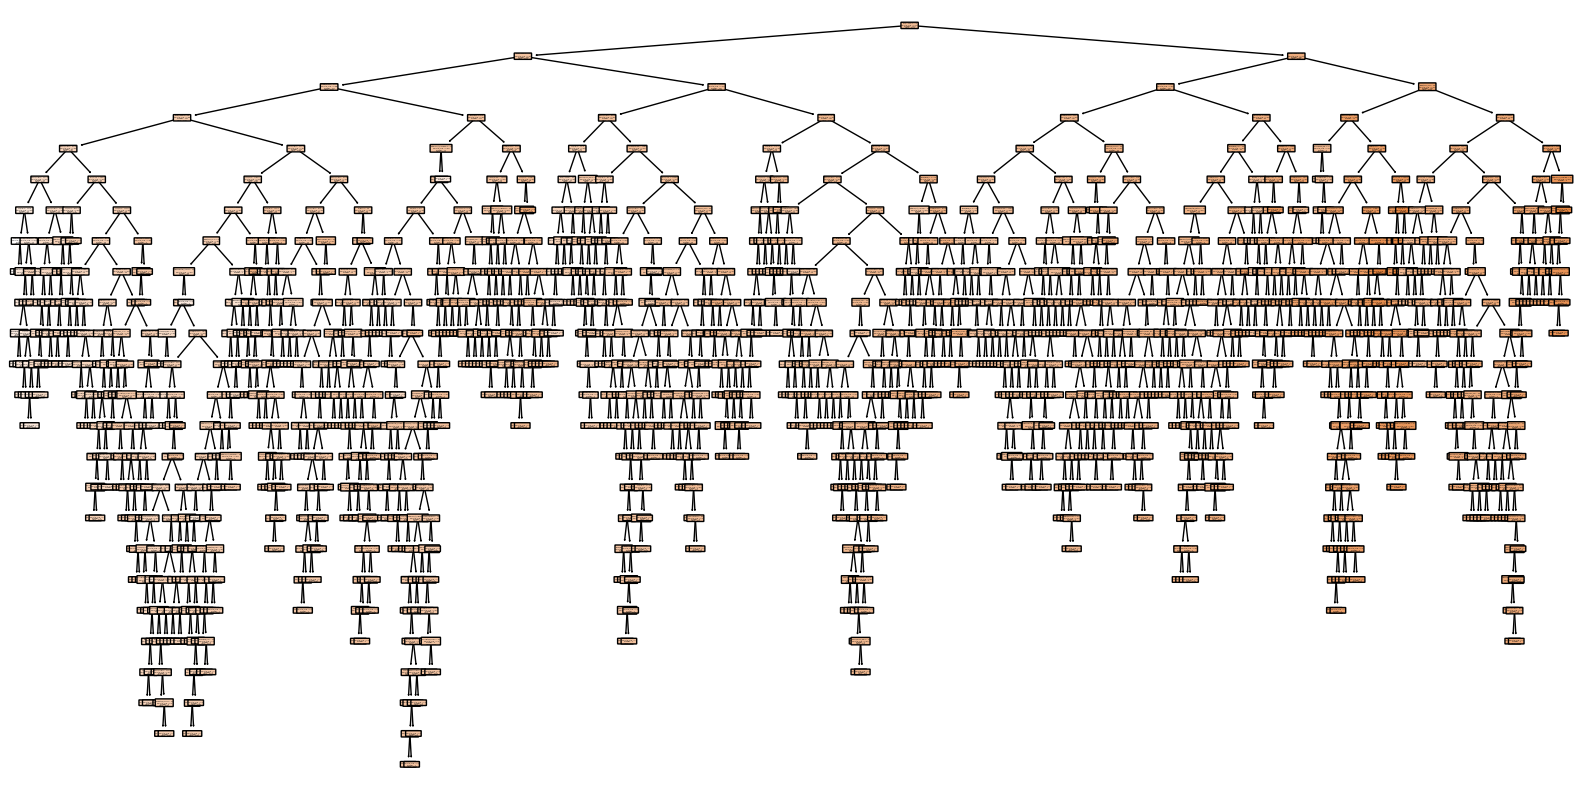

In [96]:
plt.figure(figsize=(20, 10))
plot_tree(
    DTC,
    filled=True,
    rounded=True,
    feature_names=x_train.columns,
)
plt.show()

### خخخخخخ, what is this???

i will try to prune it


In [97]:
DTC.score(x_train, y_train), DTC.score(x_test, y_test)

(1.0, 0.7016586392563389)

##### Over fit


In [98]:
path = DTC.cost_complexity_pruning_path(x_train, y_train)
alphas = path.ccp_alphas
alphas = alphas[:-1]

models_ = []

for alpha in alphas:
    DTC = DecisionTreeRegressor(random_state=0, ccp_alpha=alpha)
    DTC.fit(x_train, y_train)
    models_.append(DTC)

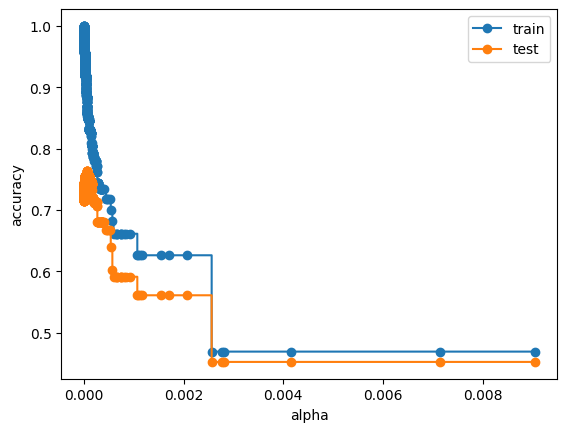

In [99]:
train_score = [DTC_.score(x_train, y_train) for DTC_ in models_]
test_score = [DTC_.score(x_test, y_test) for DTC_ in models_]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.plot(alphas, train_score, marker="o", label="train", drawstyle="steps-post")
ax.plot(alphas, test_score, marker="o", label="test", drawstyle="steps-post")
plt.legend()
plt.show()

#### Score of test data set less than 80% which is bad result, so i will skip it


# 7.0 Random forest


In [100]:
RF = RandomForestRegressor(n_estimators=50, random_state=45)
RF.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=45)

In [101]:
RF.score(x_train, y_train), RF.score(x_test, y_test)

(0.9810172016447466, 0.8627121583799932)

In [102]:
param_grid = {
    "max_depth": [25, 30, 31, 35],
    "min_samples_split": [2, 4, 5, 6],
    "min_samples_leaf": [1, 2, 3],
    "max_features": ["sqrt"],
    "ccp_alpha": [0.00001, 0.00002, 0.000001, 0.000003],
}

RF = RandomForestRegressor(n_estimators=50, random_state=45)


optimized_ridge = GridSearchCV(
    estimator=RF,
    param_grid=param_grid,
    cv=5,
    verbose=3,
)
optimized_ridge.fit(x_train, y_train)

print("best_params_", optimized_ridge.best_params_)
print("best score", optimized_ridge.best_score_)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5] END ccp_alpha=1e-05, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.908 total time=   0.1s
[CV 2/5] END ccp_alpha=1e-05, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.845 total time=   0.1s
[CV 3/5] END ccp_alpha=1e-05, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.863 total time=   0.1s
[CV 4/5] END ccp_alpha=1e-05, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.830 total time=   0.1s
[CV 5/5] END ccp_alpha=1e-05, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2;, score=0.859 total time=   0.1s
[CV 1/5] END ccp_alpha=1e-05, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=4;, score=0.912 total time=   0.1s
[CV 2/5] END ccp_alpha=1e-05, max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=4;, score=0.848 tota

In [103]:
RF = RandomForestRegressor(
    n_estimators=50,
    random_state=45,
    ccp_alpha=1e-05,
    max_depth=30,
    max_features="sqrt",
    min_samples_leaf=1,
    min_samples_split=5,
)
RF.fit(x_train, y_train)

RandomForestRegressor(ccp_alpha=1e-05, max_depth=30, max_features='sqrt',
                      min_samples_split=5, n_estimators=50, random_state=45)

In [104]:
RF.score(x_train, y_train), RF.score(x_test, y_test)

(0.9573678336061279, 0.8561031123273819)

In [105]:
MAE = mean_absolute_error(y_true=y_test, y_pred=test_prediction)
MSE = mean_squared_error(y_true=y_test, y_pred=test_prediction)
RMSE = np.sqrt(mean_absolute_error(y_true=y_test, y_pred=test_prediction))
print("MAE = ", MAE)
print("MSE = ", MSE)
print("RMSE = ", RMSE)
print("acc_score = ", score_test)

MAE =  0.040043546997599565
MSE =  0.0032903095338812642
RMSE =  0.20010883787978873
acc_score =  0.8890842880525729


In [106]:
data = {
    "model": "Random Foreest",
    "MAE": MAE,
    "MSE": MSE,
    "RMSE": RMSE,
    "train_score": score_train,
    "test_score": score_test,
}
models.loc[len(models)] = data
models

model       MAE       MSE      RMSE  train_score  test_score
0         lin reg  0.039493  0.003132  0.198728     0.924998    0.894405
1  lin reg scaled  0.040122  0.003262  0.200306     0.919444    0.890033
2           Ridge  0.039890  0.003245  0.199725     0.921619    0.890596
3         Elastic  0.040044  0.003290  0.200109     0.918875    0.889084
4  Random Foreest  0.040044  0.003290  0.200109     0.918875    0.889084

# 8.0 Votting system


In [107]:
vot = VotingRegressor(
    estimators=[
        ("LinearRegression", LinearRegression()),
        (
            "LinearRegression scaled ",
            Pipeline(
                [
                    ("Scaling", StandardScaler()),
                    ("LinearRegression", LinearRegression(positive=True)),
                ]
            ),
        ),
        ("Ridge", Ridge(alpha=5)),
        ("ElasticNet", ElasticNet(max_iter=5000, alpha=0.0005, l1_ratio=0.5)),
        (
            "RandomForestRegressor",
            RandomForestRegressor(
                n_estimators=50,
                random_state=45,
                ccp_alpha=1e-05,
                max_depth=30,
                max_features="sqrt",
                min_samples_leaf=1,
                min_samples_split=5,
            ),
        ),
    ]
)
vot.fit(x_train, y_train)

VotingRegressor(estimators=[('LinearRegression', LinearRegression()),
                            ('LinearRegression scaled ',
                             Pipeline(steps=[('Scaling', StandardScaler()),
                                             ('LinearRegression',
                                              LinearRegression(positive=True))])),
                            ('Ridge', Ridge(alpha=5)),
                            ('ElasticNet',
                             ElasticNet(alpha=0.0005, max_iter=5000)),
                            ('RandomForestRegressor',
                             RandomForestRegressor(ccp_alpha=1e-05,
                                                   max_depth=30,
                                                   max_features='sqrt',
                                                   min_samples_split=5,
                                                   n_estimators=50,
                                                   random_state=45))])

In [108]:
train_prediction = vot.predict(x_train)
test_prediction = vot.predict(x_test)

score_train = r2_score(y_true=y_train, y_pred=train_prediction)

score_test = r2_score(y_true=y_test, y_pred=test_prediction)
print("train score = ", score_train)
print("test score = ", score_test)

train score =  0.9365749521845512
test score =  0.8955949329960664


In [109]:
MAE = mean_absolute_error(y_true=y_test, y_pred=test_prediction)
MSE = mean_squared_error(y_true=y_test, y_pred=test_prediction)
RMSE = np.sqrt(mean_absolute_error(y_true=y_test, y_pred=test_prediction))
print("MAE = ", MAE)
print("MSE = ", MSE)
print("RMSE = ", RMSE)
print("acc_score = ", score_test)

MAE =  0.038575541339296374
MSE =  0.0030971715487106304
RMSE =  0.19640657152777852
acc_score =  0.8955949329960664


In [110]:
data = {
    "model": "Votting",
    "MAE": MAE,
    "MSE": MSE,
    "RMSE": RMSE,
    "train_score": score_train,
    "test_score": score_test,
}
models.loc[len(models)] = data
models

model       MAE       MSE      RMSE  train_score  test_score
0         lin reg  0.039493  0.003132  0.198728     0.924998    0.894405
1  lin reg scaled  0.040122  0.003262  0.200306     0.919444    0.890033
2           Ridge  0.039890  0.003245  0.199725     0.921619    0.890596
3         Elastic  0.040044  0.003290  0.200109     0.918875    0.889084
4  Random Foreest  0.040044  0.003290  0.200109     0.918875    0.889084
5         Votting  0.038576  0.003097  0.196407     0.936575    0.895595

In [111]:
def output_inverse(value):
    value_inverse = math.pow(10, value)
    return value_inverse


predictions = vot.predict(test)

for i in range(len(predictions)):
    predictions[i] = output_inverse(predictions[i])
predictions

array([121321.33429609, 152625.18404793, 175600.43444626, ...,
       167805.82329514, 121839.75760737, 226462.17152306])

In [112]:
submmition = pd.DataFrame({"Id": ids, "SalePrice": predictions})
submmition.to_csv(
    "/home/ahmed/Ai/Kaggle-Competitions-Notebooks/boston House price prediction/Date_set/sample_submission.csv",
    index=False,
)